After meeting on Tuesday 28 April 2020:

To do:
* [x] Fix the workflow, dont need to use Cov on test data
* [x] Fix the equation for overlapping
* [x] Overlap for 50 and 10 percent too
* [x] Grab 2.75 of the data after the cue
* [ ] PSD of C3 and C4 check the ERD

Etc, personal:
* [ ] The code is too long after finish import all function
* [ ] Try to make pd dframe side by side
___

In [1]:
%autosave 5

Autosaving every 5 seconds


---
This file will use the train_test_split function provided in sklearn_metrics  
Thus splitting training and testing data will not be performed manually  
___
In addition to that the overlapping data will be performed before CSP calculation
The amount of overlapping performed on the data are:
1. 10%
2. 50%
3. 90%


# BCI Competition IV Dataset 2a (.npz data)
<p>
Information Given in Documentation

From the documentation it is known that:
<li>25 electrodes are used, first 22 are EEG, last 3 are EOG
<li>Sampling frequency (fs) is 250Hz
<li>9 subjects
<li>9 run (run 1-3 are for eye movement, run 4-9 is MI)

<b> -- Time Duration-- </b>

1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
<li>run 1 => 2 mins with eyes open
<li>run 2 => 1 min with eyes closed
<li>run 3 => 1 min with eye movements

## Visualizing/ Preparing the Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as dframe

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# np.set_printoptions(precision=30, suppress=True)

In [4]:
# number of subject
ns = 9

In [5]:
# Load the training data of subject 01
data01 = np.load('./datasets/A01T.npz')
data02 = np.load('./datasets/A02T.npz')
data03 = np.load('./datasets/A03T.npz')
data04 = np.load('./datasets/A04T.npz')
data05 = np.load('./datasets/A05T.npz')
data06 = np.load('./datasets/A06T.npz')
data07 = np.load('./datasets/A07T.npz')
data08 = np.load('./datasets/A08T.npz')
data09 = np.load('./datasets/A09T.npz')

In [6]:
type(data01)

numpy.lib.npyio.NpzFile

In [7]:
# Keys available inside data are
data01.files

['s', 'etyp', 'epos', 'edur', 'artifacts']

In [8]:
data09['artifacts'].shape # Containing artifacts occurent in each event in all runs of a subject

(288, 1)

In [9]:
# Create table with three columns of 'etyp', 'epos', 'edur' respectively
# Name this table property
prop01 = np.c_[data01['etyp'], data01['epos'], data01['edur']]
prop02 = np.c_[data02['etyp'], data02['epos'], data02['edur']]
prop03 = np.c_[data03['etyp'], data03['epos'], data03['edur']]
prop04 = np.c_[data04['etyp'], data04['epos'], data04['edur']]
prop05 = np.c_[data05['etyp'], data05['epos'], data05['edur']]
prop06 = np.c_[data06['etyp'], data06['epos'], data06['edur']]
prop07 = np.c_[data07['etyp'], data07['epos'], data07['edur']]
prop08 = np.c_[data08['etyp'], data08['epos'], data08['edur']]
prop09 = np.c_[data09['etyp'], data09['epos'], data09['edur']]

In [10]:
prop01.shape

(603, 3)

In [11]:
pd.__version__

'1.0.3'

In [12]:
pd.options.display.max_rows = None

In [13]:
dframe(prop01, columns=['etype', 'epos','edur'])

,etype,epos,edur
0,32766,1,0
1,276,1,29682
2,32766,29684,0
3,277,29684,20271
4,32766,49956,0
5,1072,49956,41562
6,32766,91519,0
7,768,91869,1875
8,772,92369,313
9,768,93872,1875


In [14]:
# Store all 's' data into sample_data
sample_data01 = dframe(data01['s'])
sample_data02 = dframe(data02['s'])
sample_data03 = dframe(data03['s'])
sample_data04 = dframe(data04['s'])
sample_data05 = dframe(data05['s'])
sample_data06 = dframe(data06['s'])
sample_data07 = dframe(data07['s'])
sample_data08 = dframe(data08['s'])
sample_data09 = dframe(data09['s'])

In [15]:
# Remove the last 3 electrodes (EOG electrodes)
sample_data01 = sample_data01.iloc[:, 0:22]
sample_data02 = sample_data02.iloc[:, 0:22]
sample_data03 = sample_data03.iloc[:, 0:22]
sample_data04 = sample_data04.iloc[:, 0:22]
sample_data05 = sample_data05.iloc[:, 0:22]
sample_data06 = sample_data06.iloc[:, 0:22]
sample_data07 = sample_data07.iloc[:, 0:22]
sample_data08 = sample_data08.iloc[:, 0:22]
sample_data09 = sample_data09.iloc[:, 0:22]

In [16]:
sample_data01.shape

(672528, 22)

In [17]:
# Showing inital value of sample_data
sample_data01.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-26.074219,-23.144531,-24.804688,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-23.632812,-23.486328,-26.708984,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-16.845703,-22.070312,-23.828125,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-22.998047,-17.675781,-24.951172,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-32.617188,-18.701172,-24.609375,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203


In [18]:
# Sample data has shape of 67k~ samples
# This samples belong to total of all 9 runs with 48 trials of 4 different classes
for i in range(1, 10):
    var = 'sample_data0' + str(i)
    print(var, globals()[var].shape)

sample_data01 (672528, 22)
sample_data02 (677169, 22)
sample_data03 (660530, 22)
sample_data04 (600915, 22)
sample_data05 (686120, 22)
sample_data06 (678980, 22)
sample_data07 (681071, 22)
sample_data08 (675270, 22)
sample_data09 (673328, 22)


According to the documentation we are interested to grab event type of 769, left class and 770, right class

With each type has duration of 313 samples

In [19]:
# Fetch indexes whose 1st column are 769 (left) and 770 (right)
# Subject 1 - 9
for i in range(1, 10):
    idx_l = 'idx0' + str(i) + '_l'
    idx_r = 'idx0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    globals()[idx_l] = np.argwhere(prop[:, 0]==769).flatten()
    globals()[idx_r] = np.argwhere(prop[:, 0]==770).flatten()


# # Subject 01
# idx_left01 = np.argwhere(prop01[:, 0]==769).flatten()
# idx_right01 = np.argwhere(prop01[:, 0]==770).flatten()

In [20]:
idx09_l.shape, idx09_r.shape

((72,), (72,))

In [21]:
dframe(idx05_l).tail()

,0
67,585
68,587
69,589
70,591
71,611


In [22]:
# Fetch positions of corresponding event types
# Subject 01-09
for i in range(1, 10):
    pos_l = 'pos0' + str(i) + '_l'
    pos_r = 'pos0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']

    globals()[pos_l] = prop[idx_l, 1]
    globals()[pos_r] = prop[idx_r, 1]

In [23]:
pos05_l.shape, pos05_r.shape

((72,), (72,))

In [24]:
# Now this array contains index on which an event begins
# Grab the duration of each event
# Subject 01-09
for i in range(1, 10):
    dur_l = 'dur0' + str(i) + '_l'
    dur_r = 'dur0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']
    
    globals()[dur_l] = prop[idx_l, 2]
    globals()[dur_r] = prop[idx_r, 2]    

In [25]:
dur01_l

array([313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313])

In [26]:
# Duration of both events lasted for 313 samples, we can defined dur as
cue_dur = 313

Be aware that this duration is actually the duration of the cue, let's take a look at the event type table in datasheet
![event-type-table.png](./img/event-type-table.png)

The timing scheme of the paradigm suggest that the MI task last for about 2.75 since after the cue ends
![timing-scheme-paradigm.png](./img/timing-scheme-paradigm.png)

In [27]:
# The amount of sample to be clipped for 1 trial of left and right
sec = 2.75
fs = 250
mi_dur = round(sec * fs)
print('After the 313 samples cue, clip this amount of samples:', mi_dur)

After the 313 samples cue, clip this amount of samples: 688


## Fetch 688 samples of each event from sample_data, 72 trials each class

In [28]:
len(pos01_l)

72

In [29]:
# Fetch 688 samples of each event from sample_data
# Store them in E_left and E_right respectively, For convenience 'E' is used to imitate the variable used in paper
# Preparing the variables to store event samples of shape 72 x 688 x 22
# Subject 01-09
for i in range(1, 10):
    E_l = 'E0' + str(i) + '_left'
    E_r = 'E0' + str(i) + '_right'
    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    sample = globals()['sample_data0' + str(i)]
    
    globals()[E_l] = np.zeros([pos_l.shape[0], mi_dur, sample.shape[1]])
    globals()[E_r] = np.zeros([pos_r.shape[0], mi_dur, sample.shape[1]])

In [30]:
E01_left.shape, E01_right.shape

((72, 688, 22), (72, 688, 22))

In [31]:
pos05_r

array([107964, 109882, 113842, 117870, 121851, 129622, 147979, 168123,
       172306, 174349, 178433, 182368, 206717, 212788, 218686, 230368,
       232488, 242734, 256779, 262851, 267050, 283209, 287177, 293130,
       305504, 315521, 329323, 343561, 347545, 353614, 370083, 374075,
       377963, 384012, 386131, 388037, 396466, 414354, 422071, 428166,
       438484, 446341, 448445, 454450, 462811, 468938, 470910, 488914,
       493301, 503293, 516962, 522993, 535319, 537231, 543176, 545280,
       547284, 571633, 581707, 585749, 596009, 608024, 611825, 613797,
       617708, 623902, 625938, 628004, 630074, 642115, 646094, 670549])

In [32]:
# Now we are ready to take 688 samples of left and right
# Subject 01-09
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    sample = globals()['sample_data0' + str(i)]

    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    for j in range(E_l.shape[0]):
        E_l[j]=sample.iloc[pos_l[j]+cue_dur:pos_l[j]+cue_dur+mi_dur, :]
    for k in range(E_r.shape[0]):
        E_r[k]=sample.iloc[pos_r[k]+cue_dur:pos_r[k]+cue_dur+mi_dur, :]


In [33]:
# Creating columns for sample data
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))

In [34]:
E01_left.shape

(72, 688, 22)

In [35]:
dframe(E09_left[70], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,4.296875,9.912109,7.714844,4.492188,5.664062,6.103516,4.785156,10.888672,10.302734,10.253906,...,-1.171875,6.787109,8.398438,7.470703,5.468750,1.562500,5.664062,4.150391,0.439453,3.271484
1,7.080078,8.496094,10.498047,6.201172,10.058594,7.470703,7.519531,10.302734,12.402344,11.523438,...,2.685547,8.056641,9.619141,9.521484,6.689453,3.564453,4.345703,4.101562,2.636719,3.417969
2,0.585938,-0.146484,2.636719,-0.195312,4.394531,1.318359,-1.757812,0.488281,3.906250,3.808594,...,-3.759766,-2.246094,1.464844,0.976562,0.537109,-3.125000,-3.906250,-1.611328,-2.197266,-1.367188
3,2.050781,2.050781,4.199219,2.050781,6.591797,4.736328,0.000000,2.148438,6.689453,6.982422,...,-1.904297,-0.439453,4.687500,4.638672,5.664062,4.199219,4.101562,5.761719,5.566406,7.910156
4,-3.173828,-5.908203,-3.271484,-3.564453,-0.976562,0.000000,-10.937500,-5.810547,-1.611328,-0.048828,...,-6.152344,-6.738281,-1.660156,-0.341797,1.367188,-0.537109,1.513672,1.953125,2.197266,5.029297
5,-5.175781,-8.740234,-5.908203,-3.369141,-3.173828,-1.416016,-14.062500,-11.279297,-5.078125,-0.732422,...,-7.031250,-9.375000,-4.150391,-0.244141,-0.390625,-2.539062,-1.416016,0.537109,1.367188,3.125000
6,-3.955078,-11.962891,-3.857422,-2.246094,0.341797,-2.685547,-12.011719,-15.527344,-2.978516,2.148438,...,-3.027344,-8.886719,-0.634766,4.589844,2.734375,-0.097656,0.732422,4.248047,4.882812,6.640625
7,-9.179688,-20.849609,-10.986328,-7.324219,-5.908203,-11.718750,-22.363281,-29.492188,-12.988281,-4.736328,...,-10.839844,-22.265625,-12.060547,-4.052734,-4.980469,-7.226562,-7.763672,-2.197266,-2.050781,0.927734
8,-8.349609,-15.820312,-8.642578,-2.978516,-6.787109,-9.375000,-24.853516,-30.126953,-15.429688,-2.880859,...,-9.765625,-26.220703,-16.552734,-5.761719,-5.615234,-6.542969,-8.740234,-3.320312,-1.855469,0.292969
9,-7.910156,-17.089844,-8.740234,-3.125000,-10.156250,-11.914062,-27.490234,-31.933594,-18.994141,-7.324219,...,-17.285156,-32.470703,-23.144531,-12.841797,-10.888672,-11.181641,-14.208984,-9.960938,-8.154297,-5.761719


In [36]:
# First transform the dimension of each sheet of CAR array to N x T, i.e. electrodes x  samples
# Subject 01-09
for i in range(1, ns+1):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
#     try this:
    E_l_var = 'E0' + str(i) + '_left'
    E_r_var = 'E0' + str(i) + '_right'

    
    if (E_l.shape[0] != 22 and E_r.shape[0] !=22 ):
        globals()[E_l_var] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_var] = np.transpose(E_r, (0, 2, 1))

In [37]:
E01_left.shape, E01_right.shape

((72, 22, 688), (72, 22, 688))

In [38]:
dframe(E09_left[70]).head()

,0,1,2,3,4,5,6,7,8,9,...,678,679,680,681,682,683,684,685,686,687
0,4.296875,7.080078,0.585938,2.050781,-3.173828,-5.175781,-3.955078,-9.179688,-8.349609,-7.910156,...,7.763672,0.488281,-6.103516,-11.816406,-14.892578,-15.820312,-15.136719,-11.279297,-12.353516,-11.181641
1,9.912109,8.496094,-0.146484,2.050781,-5.908203,-8.740234,-11.962891,-20.849609,-15.820312,-17.089844,...,11.083984,2.490234,-3.662109,-13.281250,-14.697266,-19.482422,-14.892578,-13.769531,-15.625000,-8.544922
2,7.714844,10.498047,2.636719,4.199219,-3.271484,-5.908203,-3.857422,-10.986328,-8.642578,-8.740234,...,8.740234,0.292969,-5.957031,-12.988281,-15.576172,-18.066406,-18.847656,-13.330078,-14.355469,-12.451172
3,4.492188,6.201172,-0.195312,2.050781,-3.564453,-3.369141,-2.246094,-7.324219,-2.978516,-3.125000,...,10.791016,-2.197266,-8.837891,-15.185547,-15.576172,-18.212891,-14.306641,-13.183594,-13.085938,-8.203125
4,5.664062,10.058594,4.394531,6.591797,-0.976562,-3.173828,0.341797,-5.908203,-6.787109,-10.156250,...,10.791016,1.220703,-2.880859,-8.105469,-10.058594,-10.351562,-10.595703,-6.835938,-6.787109,-5.859375


## Perform Overlap on Data

![overlap-eq.png](./img/overlap_equation.png)

In [39]:
# 

def overlap(fs, E_data, overlap):
    '''
    This function will return array of overlapped data in sample domain
    Parameter: 
    fs : sampling frequency
    E_data : original EEG sample data, dimension of trial x electrode x samples
    overlap : % data to be overlapped
    '''
    old, nel, dur = E_data.shape # no. of old trials 72, electrode 22, samples 688
    inc = int((round(1-overlap,1))*fs) # increment value
    n   = int((dur - fs)/inc) + 1 # no. of portion single trial is sliced into
    new = n * old # no. of new trial
    
    # Prepare the array to store overlapped data
    # Should be dimension of no.trials*fold x no. of eletrode x np. of overlapped samples
    E_data_new = np.zeros((old*n, nel, fs))
    
    # Overlapping data
    for i in range(old):
        for j in range(n):
            temp = E_data[i][:, j*inc:j*inc+fs]
            E_data_new[(i*n)+(j)] = temp
    
    return E_data_new

In [40]:
help(overlap)

Help on function overlap in module __main__:

overlap(fs, E_data, overlap)
    This function will return array of overlapped data in sample domain
    Parameter: 
    fs : sampling frequency
    E_data : original EEG sample data, dimension of trial x electrode x samples
    overlap : % data to be overlapped



In [41]:
# Overlap for 90%
for i in range(1, ns+1):
    E_l_ol90 = 'E0' + str(i) + '_l_ol90'
    E_r_ol90 = 'E0' + str(i) + '_r_ol90'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol90] = overlap(250, E_l, 0.9)
    globals()[E_r_ol90] = overlap(250, E_r, 0.9)
    
# Overlap for 50%
for i in range(1, ns+1):
    E_l_ol50 = 'E0' + str(i) + '_l_ol50'
    E_r_ol50 = 'E0' + str(i) + '_r_ol50'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol50] = overlap(250, E_l, 0.5)
    globals()[E_r_ol50] = overlap(250, E_r, 0.5)
    
# Overlap for 10%
for i in range(1, ns+1):
    E_l_ol10 = 'E0' + str(i) + '_l_ol10'
    E_r_ol10 = 'E0' + str(i) + '_r_ol10'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol10] = overlap(250, E_l, 0.1)
    globals()[E_r_ol10] = overlap(250, E_r, 0.1)

In [42]:
E01_l_ol90.shape, E01_r_ol90.shape

((1296, 22, 250), (1296, 22, 250))

In [43]:
E01_l_ol50.shape, E01_r_ol50.shape

((288, 22, 250), (288, 22, 250))

In [44]:
E01_l_ol10.shape, E01_r_ol10.shape

((144, 22, 250), (144, 22, 250))

In [45]:
# The 250 samples data has to be clipped from the normal data in order to match the samples from overlap
for i in range(1,ns+1):
    E_left = globals()['E0' + str(i) + '_left']
    E_right = globals()['E0' + str(i) + '_right']
    
    E_l = 'E0' + str(i) + '_l'
    E_r = 'E0' + str(i) + '_r'
    
    globals()[E_l] = E_left[:, :, :fs]
    globals()[E_r] = E_right[:, :, :fs]

In [46]:
E01_l.shape, E01_r.shape

((72, 22, 250), (72, 22, 250))

In [47]:
pd.options.display.max_columns = None

In [48]:
dframe(E02_l[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,-11.181641,-14.746094,-5.371094,-12.060547,-4.541016,-3.564453,3.222656,11.132812,0.488281,23.828125,9.277344,9.619141,1.562500,4.931641,-5.957031,-10.107422,5.566406,7.421875,-1.660156,3.515625,-20.898438,-22.216797,-17.529297,-9.228516,-12.548828,-1.367188,2.392578,-3.613281,6.982422,1.611328,12.597656,19.921875,11.181641,-4.589844,2.343750,-3.515625,-7.519531,-1.318359,-5.810547,-0.488281,-1.513672,-2.441406,2.343750,10.351562,3.125000,20.458984,6.884766,12.548828,-1.171875,4.589844,4.833984,16.015625,-4.931641,4.101562,-2.685547,-8.056641,-9.423828,-10.693359,-0.537109,10.644531,-7.519531,34.277344,-11.962891,-2.294922,4.248047,-16.796875,-23.681641,-0.732422,-17.041016,-1.611328,-0.390625,0.634766,2.343750,21.484375,2.246094,9.472656,-1.757812,-3.710938,4.003906,9.814453,14.746094,12.548828,10.156250,10.449219,30.810547,21.972656,24.609375,25.146484,12.011719,-2.246094,25.683594,1.171875,0.732422,7.128906,2.832031,-0.976562,22.900391,13.427734,5.468750,13.623047,10.400391,10.693359,30.957031,10.058594,13.378906,4.833984,-9.863281,-10.302734,1.123047,0.976562,5.664062,-1.904297,14.892578,6.835938,22.363281,-5.615234,4.443359,4.296875,20.654297,-9.814453,6.347656,12.158203,5.957031,-7.226562,-5.615234,8.886719,-0.732422,-4.052734,17.285156,-8.203125,-12.402344,-8.251953,4.101562,-21.240234,-4.296875,-4.541016,-13.916016,-12.939453,-3.857422,3.125000,7.617188,22.851562,7.373047,0.488281,-10.156250,7.861328,-12.304688,-13.476562,-7.275391,-1.757812,-1.513672,10.791016,28.027344,0.390625,8.203125,0.244141,-11.816406,-6.250000,12.744141,-7.128906,2.246094,11.767578,17.285156,12.597656,-1.123047,8.691406,1.367188,-24.658203,-16.699219,-2.734375,-19.335938,-11.962891,-15.869141,-14.062500,10.449219,-0.830078,16.699219,1.269531,-5.322266,19.482422,-2.001953,-3.759766,-2.001953,-2.832031,-4.394531,-5.664062,2.539062,1.318359,43.408203,-3.906250,19.287109,12.500000,-2.832031,-11.669922,-4.980469,2.832031,-6.884766,6.250000,12.646484,1.074219,2.294922,2.294922,-3.564453,-7.275391,16.113281,-1.855469,12.597656,14.404297,4.882812,-13.623047,-6.591797,-10.058594,19.189453,-3.417969,-6.201172,20.214844,-8.984375,-3.320312,-2.050781,6.542969,4.833984,14.697266,2.392578,0.000000,-3.808594,8.740234,-4.199219,-8.593750,6.787109,0.781250,0.439453,8.154297,3.369141,43.554688,19.921875,12.646484,5.664062,-14.160156,-14.404297,-17.724609,-9.082031,3.369141,-3.369141,6.787109,4.687500,12.109375,-9.765625,-6.884766,-17.187500,-21.679688
1,-10.156250,-11.962891,-2.246094,-12.109375,-6.445312,-7.226562,6.103516,10.107422,1.708984,23.974609,4.931641,6.152344,-3.662109,-0.732422,-4.394531,-8.544922,7.031250,21.923828,-3.613281,6.982422,-18.115234,-24.462891,-20.898438,-9.863281,-12.255859,3.759766,-4.052734,-7.275391,2.783203,-4.541016,4.248047,16.943359,7.470703,-3.173828,-0.830078,-1.562500,-9.619141,-5.957031,-5.126953,-0.634766,-3.076172,12.255859,-4.931641,11.474609,2.099609,14.013672,-0.732422,6.494141,-6.250000,2.148438,2.636719,13.867188,-6.542969,3.222656,1.318359,-5.712891,-9.130859,-10.742188,0.976562,8.398438,-6.250000,33.496094,-9.033203,4.492188,-2.783203,-15.62

In [49]:
dframe(E02_l_ol10[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,-11.181641,-14.746094,-5.371094,-12.060547,-4.541016,-3.564453,3.222656,11.132812,0.488281,23.828125,9.277344,9.619141,1.562500,4.931641,-5.957031,-10.107422,5.566406,7.421875,-1.660156,3.515625,-20.898438,-22.216797,-17.529297,-9.228516,-12.548828,-1.367188,2.392578,-3.613281,6.982422,1.611328,12.597656,19.921875,11.181641,-4.589844,2.343750,-3.515625,-7.519531,-1.318359,-5.810547,-0.488281,-1.513672,-2.441406,2.343750,10.351562,3.125000,20.458984,6.884766,12.548828,-1.171875,4.589844,4.833984,16.015625,-4.931641,4.101562,-2.685547,-8.056641,-9.423828,-10.693359,-0.537109,10.644531,-7.519531,34.277344,-11.962891,-2.294922,4.248047,-16.796875,-23.681641,-0.732422,-17.041016,-1.611328,-0.390625,0.634766,2.343750,21.484375,2.246094,9.472656,-1.757812,-3.710938,4.003906,9.814453,14.746094,12.548828,10.156250,10.449219,30.810547,21.972656,24.609375,25.146484,12.011719,-2.246094,25.683594,1.171875,0.732422,7.128906,2.832031,-0.976562,22.900391,13.427734,5.468750,13.623047,10.400391,10.693359,30.957031,10.058594,13.378906,4.833984,-9.863281,-10.302734,1.123047,0.976562,5.664062,-1.904297,14.892578,6.835938,22.363281,-5.615234,4.443359,4.296875,20.654297,-9.814453,6.347656,12.158203,5.957031,-7.226562,-5.615234,8.886719,-0.732422,-4.052734,17.285156,-8.203125,-12.402344,-8.251953,4.101562,-21.240234,-4.296875,-4.541016,-13.916016,-12.939453,-3.857422,3.125000,7.617188,22.851562,7.373047,0.488281,-10.156250,7.861328,-12.304688,-13.476562,-7.275391,-1.757812,-1.513672,10.791016,28.027344,0.390625,8.203125,0.244141,-11.816406,-6.250000,12.744141,-7.128906,2.246094,11.767578,17.285156,12.597656,-1.123047,8.691406,1.367188,-24.658203,-16.699219,-2.734375,-19.335938,-11.962891,-15.869141,-14.062500,10.449219,-0.830078,16.699219,1.269531,-5.322266,19.482422,-2.001953,-3.759766,-2.001953,-2.832031,-4.394531,-5.664062,2.539062,1.318359,43.408203,-3.906250,19.287109,12.500000,-2.832031,-11.669922,-4.980469,2.832031,-6.884766,6.250000,12.646484,1.074219,2.294922,2.294922,-3.564453,-7.275391,16.113281,-1.855469,12.597656,14.404297,4.882812,-13.623047,-6.591797,-10.058594,19.189453,-3.417969,-6.201172,20.214844,-8.984375,-3.320312,-2.050781,6.542969,4.833984,14.697266,2.392578,0.000000,-3.808594,8.740234,-4.199219,-8.593750,6.787109,0.781250,0.439453,8.154297,3.369141,43.554688,19.921875,12.646484,5.664062,-14.160156,-14.404297,-17.724609,-9.082031,3.369141,-3.369141,6.787109,4.687500,12.109375,-9.765625,-6.884766,-17.187500,-21.679688
1,-10.156250,-11.962891,-2.246094,-12.109375,-6.445312,-7.226562,6.103516,10.107422,1.708984,23.974609,4.931641,6.152344,-3.662109,-0.732422,-4.394531,-8.544922,7.031250,21.923828,-3.613281,6.982422,-18.115234,-24.462891,-20.898438,-9.863281,-12.255859,3.759766,-4.052734,-7.275391,2.783203,-4.541016,4.248047,16.943359,7.470703,-3.173828,-0.830078,-1.562500,-9.619141,-5.957031,-5.126953,-0.634766,-3.076172,12.255859,-4.931641,11.474609,2.099609,14.013672,-0.732422,6.494141,-6.250000,2.148438,2.636719,13.867188,-6.542969,3.222656,1.318359,-5.712891,-9.130859,-10.742188,0.976562,8.398438,-6.250000,33.496094,-9.033203,4.492188,-2.783203,-15.62

## Split train, test, then covariance

In [50]:
def split3D(E_left, E_right, percent_tr):
    '''
    split3D will received 3D array of left and right trial with dimension of trial x electrodes x samples
    and then split them based on the percentage n_tr
    Parameter: 
        * E_left, E_right, 3D array
        * n_tr, % portion of data to be split as train data, the rest will serve as test data, allowed range(0.0 - 1.0)

    Return: E_left_tr, E_right_tr, E_left_te, E_right_te
    '''
    if E_left.shape[0] != E_right.shape[0]:
        return "Left and right class dont have equal number of trials"
    else:
        ntr = round(E_left.shape[0]*percent_tr)
        nte = E_left.shape[0] - ntr
        E_left_tr = E_left[:ntr]
        E_right_tr = E_right[:ntr]
        E_left_te = E_left[ntr:ntr+nte]
        E_right_te = E_right[ntr:ntr+nte]
        
        return E_left_tr, E_right_tr, E_left_te, E_right_te
    

In [51]:
help(split3D)

Help on function split3D in module __main__:

split3D(E_left, E_right, percent_tr)
    split3D will received 3D array of left and right trial with dimension of trial x electrodes x samples
    and then split them based on the percentage n_tr
    Parameter: 
        * E_left, E_right, 3D array
        * n_tr, % portion of data to be split as train data, the rest will serve as test data, allowed range(0.0 - 1.0)
    
    Return: E_left_tr, E_right_tr, E_left_te, E_right_te



In [52]:
# Splitting all data into training and test
# -------- Normal Data ------------
for i in range(1, ns+1):
    E_l_tr = 'E0' + str(i) + '_l_tr'
    E_r_tr = 'E0' + str(i) + '_r_tr'
    
    E_l_te = 'E0' + str(i) + '_l_te'
    E_r_te = 'E0' + str(i) + '_r_te'
    
    E_l = globals()['E0' + str(i) + '_l']
    E_r = globals()['E0' + str(i) + '_r']
    
    globals()[E_l_tr], globals()[E_r_tr],\
    globals()[E_l_te], globals()[E_r_te] = split3D(E_l, E_r, 0.8)

# -------- 90% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol90_tr = 'E0' + str(i) + '_l_ol90_tr'
    E_r_ol90_tr = 'E0' + str(i) + '_r_ol90_tr'
    
    E_l_ol90_te = 'E0' + str(i) + '_l_ol90_te'
    E_r_ol90_te = 'E0' + str(i) + '_r_ol90_te'
    
    E_l_ol90 = globals()['E0' + str(i) + '_l_ol90']
    E_r_ol90 = globals()['E0' + str(i) + '_r_ol90']
    
    globals()[E_l_ol90_tr], globals()[E_r_ol90_tr],\
    globals()[E_l_ol90_te], globals()[E_r_ol90_te] = split3D(E_l_ol90, E_r_ol90, 0.8)


# -------- 50% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol50_tr = 'E0' + str(i) + '_l_ol50_tr'
    E_r_ol50_tr = 'E0' + str(i) + '_r_ol50_tr'
    
    E_l_ol50_te = 'E0' + str(i) + '_l_ol50_te'
    E_r_ol50_te = 'E0' + str(i) + '_r_ol50_te'
    
    E_l_ol50 = globals()['E0' + str(i) + '_l_ol50']
    E_r_ol50 = globals()['E0' + str(i) + '_r_ol50']
    
    globals()[E_l_ol50_tr], globals()[E_r_ol50_tr],\
    globals()[E_l_ol50_te], globals()[E_r_ol50_te] = split3D(E_l_ol50, E_r_ol50, 0.8)
    
    
# -------- 10% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol10_tr = 'E0' + str(i) + '_l_ol10_tr'
    E_r_ol10_tr = 'E0' + str(i) + '_r_ol10_tr'
    
    E_l_ol10_te = 'E0' + str(i) + '_l_ol10_te'
    E_r_ol10_te = 'E0' + str(i) + '_r_ol10_te'
    
    E_l_ol10 = globals()['E0' + str(i) + '_l_ol10']
    E_r_ol10 = globals()['E0' + str(i) + '_r_ol10']
    
    globals()[E_l_ol10_tr], globals()[E_r_ol10_tr],\
    globals()[E_l_ol10_te], globals()[E_r_ol10_te] = split3D(E_l_ol10, E_r_ol10, 0.8)

In [53]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape, E01_l_ol90_te.shape, E01_r_ol90_te.shape

((1037, 22, 250), (1037, 22, 250), (259, 22, 250), (259, 22, 250))

In [54]:
E01_l_ol50_tr.shape, E01_r_ol50_tr.shape, E01_l_ol50_te.shape, E01_r_ol50_te.shape

((230, 22, 250), (230, 22, 250), (58, 22, 250), (58, 22, 250))

In [55]:
E01_l_ol10_tr.shape, E01_r_ol10_tr.shape, E01_l_ol10_te.shape, E01_r_ol10_te.shape

((115, 22, 250), (115, 22, 250), (29, 22, 250), (29, 22, 250))

In [56]:
E01_l_tr.shape, E01_r_tr.shape, E01_l_te.shape, E01_r_te.shape

((58, 22, 250), (58, 22, 250), (14, 22, 250), (14, 22, 250))

In [57]:
dframe(E01_l_ol90_tr[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,18.115234,21.044922,18.847656,24.951172,16.699219,19.921875,18.359375,20.458984,19.384766,17.333984,22.070312,14.941406,14.208984,5.957031,3.271484,-4.052734,-7.421875,-11.230469,-8.984375,-10.595703,-4.296875,-7.226562,1.025391,-5.126953,-2.539062,-0.146484,-5.761719,-0.292969,1.025391,4.882812,1.123047,3.515625,6.738281,6.298828,5.712891,2.392578,-1.757812,-0.781250,0.634766,1.953125,-3.710938,-6.738281,-11.376953,-17.822266,-21.923828,-16.113281,-11.181641,-7.861328,-4.931641,-7.031250,-1.806641,2.050781,3.906250,8.740234,9.765625,10.644531,4.345703,6.982422,3.808594,4.882812,7.763672,6.933594,11.035156,6.298828,0.830078,1.660156,4.345703,4.296875,10.253906,13.232422,10.693359,10.693359,4.931641,8.398438,3.857422,7.324219,7.031250,13.525391,15.722656,11.718750,12.646484,11.523438,13.818359,11.279297,23.730469,20.312500,26.318359,23.632812,25.000000,27.050781,24.218750,25.439453,19.970703,25.634766,22.851562,22.216797,21.044922,18.505859,8.007812,6.054688,6.884766,9.667969,13.769531,17.675781,8.837891,11.669922,7.421875,7.763672,9.716797,7.128906,10.498047,6.494141,7.373047,3.515625,7.568359,-2.587891,-7.910156,-10.644531,-16.699219,-20.947266,-19.677734,-15.673828,-12.451172,-13.525391,-8.984375,-9.765625,-10.595703,-8.007812,-14.648438,-6.689453,-11.181641,-8.496094,-5.078125,-2.636719,0.048828,3.906250,1.708984,-2.294922,-10.986328,-12.988281,-11.376953,-7.861328,-4.101562,-6.689453,0.195312,-7.666016,-14.355469,-10.937500,-13.134766,-19.189453,-17.724609,-15.478516,-11.865234,-14.599609,-6.445312,-5.078125,-1.171875,-7.031250,-0.927734,-2.441406,-9.814453,-10.546875,-13.623047,-12.597656,-15.039062,-14.257812,-16.894531,-16.699219,-17.333984,-20.458984,-15.576172,-13.281250,-10.302734,-8.544922,-9.130859,-5.566406,-10.937500,-4.199219,-4.199219,0.976562,-0.439453,3.808594,-3.222656,-6.884766,-12.597656,-16.650391,-13.720703,-11.474609,-3.173828,-8.789062,-4.638672,-5.615234,-5.175781,-4.150391,0.585938,3.662109,6.347656,6.738281,2.490234,10.156250,7.958984,-2.001953,-4.101562,-5.273438,-7.275391,-11.328125,-16.406250,-22.119141,-24.316406,-27.880859,-25.634766,-11.279297,-5.224609,-5.517578,-0.976562,-0.097656,1.806641,5.078125,1.220703,-1.513672,-2.929688,-2.685547,-10.791016,-10.595703,-16.748047,-17.431641,-18.212891,-10.986328,-12.597656,-14.404297,-16.308594,-19.873047,-17.285156,-13.183594,-10.644531,-6.640625,-0.732422,1.953125,-2.294922,2.148438,3.076172,-6.347656,-7.666016,-4.589844,-5.859375,-8.935547,-5.566406,-3.466797,3.466797,-2.148438
1,15.917969,18.701172,19.628906,23.193359,16.796875,21.923828,18.115234,25.292969,21.289062,17.382812,22.705078,13.281250,14.648438,4.687500,5.224609,-2.001953,-3.173828,-8.007812,-2.343750,-5.126953,-1.220703,-1.220703,7.128906,-1.025391,0.585938,6.445312,-1.904297,3.320312,2.001953,8.837891,3.662109,8.935547,7.812500,10.107422,1.611328,1.074219,-4.199219,-2.978516,2.148438,5.761719,2.539062,2.441406,-4.785156,-8.886719,-16.162109,-11.621094,-4.882812,-3.320312,0.244141,2.294922,7.666016,12.451172,17.333984,18.701172,17.041016,13.720703,4.785156,5.761719,2.099609,5.175781,4.541016,2.587891,3.906250,

## Processing Training Data

### Spatial Covariance and Composite Covariance
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

Then calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$

  
  

In [58]:
def compCov(E_left, E_right):
    '''
    compCov receive left and right class 3D array with dimension of trial x electrodes x samples
    Then calculate the covariance of each class, average them, and add them together
    Finally, this function returns 2D composite covariance
    Parameter: 
        * E_left, E_right, each dimension must be the same
    Return: composite averaged covariance
    '''
    nel = E_left.shape[1]
    Cov_left = np.zeros((E_left.shape[0], nel, nel))
    Cov_right = np.zeros((E_right.shape[0], nel, nel))

    for i in range(E_left.shape[0]):
        Cov_left[i, :, :] = (E_left[i, :, :]@E_left[i, :, :].T)/np.trace(E_left[i, :, :]@E_left[i, :, :].T)

    for i in range(E_right.shape[0]):
        Cov_right[i, :, :] = (E_right[i, :, :]@E_right[i, :, :].T)/np.trace(E_right[i, :, :]@E_right[i, :, :].T)
        
    # Average covariance left and right    
    avgCov_l = np.sum(Cov_left, axis=0)/Cov_left.shape[0]
    avgCov_r = np.sum(Cov_right, axis=0)/Cov_right.shape[0]
    
    avgCov_c = avgCov_l + avgCov_r
    return avgCov_c, avgCov_l, avgCov_r
    

In [59]:
help(compCov)

Help on function compCov in module __main__:

compCov(E_left, E_right)
    compCov receive left and right class 3D array with dimension of trial x electrodes x samples
    Then calculate the covariance of each class, average them, and add them together
    Finally, this function returns 2D composite covariance
    Parameter: 
        * E_left, E_right, each dimension must be the same
    Return: composite averaged covariance



In [60]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape, E01_l_ol50_tr.shape, E01_r_ol50_tr.shape

((1037, 22, 250), (1037, 22, 250), (230, 22, 250), (230, 22, 250))

In [61]:
E01_l_ol10_tr.shape, E01_r_ol10_tr.shape, E01_l_tr.shape, E01_r_tr.shape

((115, 22, 250), (115, 22, 250), (58, 22, 250), (58, 22, 250))

In [62]:
# ============ Normal Data ====================
for i in range(1, ns+1):
    Cov_l_tr = 'Cov0' + str(i) + '_l_tr'
    Cov_r_tr = 'Cov0' + str(i) + '_r_tr'
    Cov_c_tr = 'Cov0' + str(i) + '_c_tr'
    
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    
    globals()[Cov_c_tr], globals()[Cov_l_tr], globals()[Cov_r_tr] = compCov(E_l_tr, E_r_tr)

# ============ 90% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol90_tr = 'Cov0' + str(i) + '_l_ol90_tr'
    Cov_r_ol90_tr = 'Cov0' + str(i) + '_r_ol90_tr'
    Cov_c_ol90_tr = 'Cov0' + str(i) + '_c_ol90_tr'
    
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    
    globals()[Cov_c_ol90_tr], globals()[Cov_l_ol90_tr], globals()[Cov_r_ol90_tr] = compCov(E_l_ol90_tr, E_r_ol90_tr)

# ============ 50% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol50_tr = 'Cov0' + str(i) + '_l_ol50_tr'
    Cov_r_ol50_tr = 'Cov0' + str(i) + '_r_ol50_tr'
    Cov_c_ol50_tr = 'Cov0' + str(i) + '_c_ol50_tr'
    
    E_l_ol50_tr = globals()['E0' + str(i) + '_l_ol50_tr']
    E_r_ol50_tr = globals()['E0' + str(i) + '_r_ol50_tr']
    
    globals()[Cov_c_ol50_tr], globals()[Cov_l_ol50_tr], globals()[Cov_r_ol50_tr] = compCov(E_l_ol50_tr, E_r_ol50_tr)
    
# ============ 10% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol10_tr = 'Cov0' + str(i) + '_l_ol10_tr'
    Cov_r_ol10_tr = 'Cov0' + str(i) + '_r_ol10_tr'
    Cov_c_ol10_tr = 'Cov0' + str(i) + '_c_ol10_tr'
    
    E_l_ol10_tr = globals()['E0' + str(i) + '_l_ol10_tr']
    E_r_ol10_tr = globals()['E0' + str(i) + '_r_ol10_tr']
    
    globals()[Cov_c_ol10_tr], globals()[Cov_l_ol10_tr], globals()[Cov_r_ol10_tr] = compCov(E_l_ol10_tr, E_r_ol10_tr)

In [63]:
Cov01_c_ol10_tr.shape

(22, 22)

In [64]:
dframe(Cov01_r_tr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.046451,0.039938,0.045548,0.047696,0.045953,0.041345,0.027717,0.035324,0.040849,0.043503,0.041685,0.036473,0.028808,0.031478,0.035832,0.036131,0.035631,0.032975,0.028492,0.030058,0.028330,0.022711
1,0.039938,0.042831,0.044094,0.044565,0.040046,0.036219,0.031159,0.039367,0.041405,0.043106,0.037969,0.033532,0.024301,0.035505,0.037067,0.037191,0.034389,0.030747,0.030804,0.031131,0.028251,0.023936
2,0.045548,0.044094,0.049610,0.049935,0.046815,0.040887,0.032219,0.041001,0.046430,0.048450,0.044573,0.038014,0.028800,0.037290,0.041756,0.041539,0.039605,0.035513,0.033978,0.035137,0.032399,0.026955
3,0.047696,0.044565,0.049935,0.054961,0.050208,0.045978,0.030523,0.041360,0.046794,0.052161,0.047521,0.042506,0.031335,0.038181,0.042121,0.044381,0.042673,0.038713,0.034689,0.036606,0.034384,0.027929
4,0.045953,0.040046,0.046815,0.050208,0.050263,0.046044,0.028612,0.037835,0.044696,0.048906,0.047864,0.042851,0.033965,0.035005,0.040893,0.042436,0.042351,0.039591,0.033604,0.036102,0.034750,0.027867


In [65]:
dframe(Cov01_l_tr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.050230,0.042145,0.047949,0.050112,0.048782,0.044173,0.028906,0.036486,0.042805,0.045242,0.044223,0.039029,0.032011,0.032088,0.036933,0.037562,0.037569,0.034859,0.029728,0.031411,0.030286,0.023632
1,0.042145,0.043741,0.045244,0.045636,0.041713,0.037975,0.031442,0.039536,0.042139,0.043628,0.039559,0.035359,0.026876,0.035117,0.037163,0.037673,0.035710,0.032220,0.031306,0.031746,0.029749,0.024434
2,0.047949,0.045244,0.050948,0.051197,0.048605,0.042675,0.032603,0.041099,0.047262,0.049052,0.046176,0.039786,0.031398,0.036889,0.041793,0.041961,0.040835,0.036823,0.034423,0.035648,0.033690,0.027334
3,0.050112,0.045636,0.051197,0.056512,0.051720,0.047433,0.030697,0.041252,0.047523,0.052421,0.048748,0.043701,0.033417,0.037615,0.041843,0.044410,0.043143,0.039185,0.034738,0.036599,0.035015,0.027746
4,0.048782,0.041713,0.048605,0.051720,0.052271,0.048111,0.029783,0.038426,0.045786,0.049706,0.049515,0.044658,0.036691,0.035294,0.041283,0.042766,0.043355,0.040853,0.034240,0.036720,0.035855,0.028269


### Decompose Covariance Matrix
Eigendecompose matrix $C_c$, such that
$$C_c = U_c\lambda_cU'_c$$
The eigenvalues in this calculated are sorted in descending order

In [66]:
def decomposeCov(avgCov):
    '''
    This function will decompose covariance matrix of each subject into eigenvec, eigenval, and eigenvec_transpose
    Parameter:
    avgVoc
    
    Return:
    λ_dsc and V_dsc, i.e. eigenvalues and eigenvector in descending order
    
    '''
    λ, V = np.linalg.eig(avgCov)
    λ_dsc = np.sort(λ)[::-1] # Sort eigenvalue descending order, default is ascending order sort
    idx_dsc = np.argsort(λ)[::-1]
    V_dsc = V[:, idx_dsc] # Sort eigenvectors descending order
    λ_dsc = np.diag(λ_dsc) # Diagonalize λ_dsc
    return λ_dsc, V_dsc

In [67]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = 'λ0' + str(i) + '_dsc'
    V_dsc = 'V0' + str(i) + '_dsc'
    
    Cov_tr = globals()['Cov0' + str(i) + '_c_tr']
    
    globals()[λ_dsc], globals()[V_dsc] = decomposeCov(Cov_tr)

# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = 'λ0' + str(i) + '_ol90_dsc'
    V_ol90_dsc = 'V0' + str(i) + '_ol90_dsc'
    
    Cov_ol90_tr = globals()['Cov0' + str(i) + '_c_ol90_tr']
    
    globals()[λ_ol90_dsc], globals()[V_ol90_dsc] = decomposeCov(Cov_ol90_tr)
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol50_dsc = 'λ0' + str(i) + '_ol50_dsc'
    V_ol50_dsc = 'V0' + str(i) + '_ol50_dsc'
    
    Cov_ol50_tr = globals()['Cov0' + str(i) + '_c_ol50_tr']
    
    globals()[λ_ol50_dsc], globals()[V_ol50_dsc] = decomposeCov(Cov_ol50_tr)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol10_dsc = 'λ0' + str(i) + '_ol10_dsc'
    V_ol10_dsc = 'V0' + str(i) + '_ol10_dsc'
    
    Cov_ol10_tr = globals()['Cov0' + str(i) + '_c_ol10_tr']
    
    globals()[λ_ol10_dsc], globals()[V_ol10_dsc] = decomposeCov(Cov_ol10_tr)

In [68]:
dframe(λ01_ol90_dsc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.684832,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.143754,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.079653,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.025002,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.02051,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.012082,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008887,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005297,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.003419,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


### White Transformation Matrix P 
Construct the whiten transformation matrix P:
$$P = \sqrt{\lambda_c^{-1}}U'_c$$
<br>
The whitening transformation equalizes the variances in the space spanned by $U_c$, i.e., all eigenvalues of ${PC_CP'}$ are equal to identity matrix.

In [69]:
def whiteMatrix(λ_dsc, V_dsc):
    '''
    '''
    λ_dsc_sqr = np.sqrt(np.linalg.inv(λ_dsc))
    P = (λ_dsc_sqr)@(V_dsc.T)
    
    return P

def ifWhiteIdentity(P, Cov_c):
    '''
    '''
    # Try if eigenval of PCcP' equal to identity matrix
    temp = P@Cov_c@P.T
    temp = np.diag(np.linalg.eigvals(temp))
    
    return abs(temp)

In [70]:
# Computing White Transformation Matrix P
print('Computing white transformation matrix....\n')

# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = globals()['λ0' + str(i) + '_dsc']
    V_dsc = globals()['V0' + str(i) + '_dsc']
    P = 'P0' + str(i)
    
    globals()[P] = whiteMatrix(λ_dsc, V_dsc)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = globals()['λ0' + str(i) + '_ol90_dsc']
    V_ol90_dsc = globals()['V0' + str(i) + '_ol90_dsc']
    
    P_ol90 = 'P0' + str(i) + '_ol90'
    
    globals()[P_ol90] = whiteMatrix(λ_ol90_dsc, V_ol90_dsc)

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol50_dsc = globals()['λ0' + str(i) + '_ol50_dsc']
    V_ol50_dsc = globals()['V0' + str(i) + '_ol50_dsc']
    
    P_ol50 = 'P0' + str(i) + '_ol50'
    
    globals()[P_ol50] = whiteMatrix(λ_ol50_dsc, V_ol50_dsc)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol10_dsc = globals()['λ0' + str(i) + '_ol10_dsc']
    V_ol10_dsc = globals()['V0' + str(i) + '_ol10_dsc']
    
    P_ol10 = 'P0' + str(i) + '_ol10'
    
    globals()[P_ol10] = whiteMatrix(λ_ol10_dsc, V_ol10_dsc)

print('White transfomartion has dimension of: ', P01.shape)

Computing white transformation matrix....

White transfomartion has dimension of:  (22, 22)


In [71]:
P01_ol90.shape

(22, 22)

In [72]:
dframe(P04_ol90).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.158064,-0.155695,-0.173455,-0.181909,-0.176986,-0.163320,-0.127106,-0.158732,-0.179520,-0.191324,-0.185194,-0.170869,-0.141572,-0.160991,-0.176488,-0.186731,-0.182397,-0.169428,-0.165126,-0.175667,-0.168455,-0.149861
1,-0.731040,-0.495133,-0.517960,-0.559217,-0.491324,-0.437184,-0.185261,-0.161474,-0.176965,-0.167739,-0.142121,-0.114067,-0.087864,0.198991,0.215882,0.276839,0.259513,0.255363,0.674325,0.684679,0.722951,0.987708
2,-0.034415,0.868046,0.470115,0.016854,-0.514121,-0.892687,1.251690,1.001803,0.540561,0.053298,-0.544282,-1.068876,-1.255894,0.960832,0.533272,0.088732,-0.507486,-1.012141,0.528607,0.102539,-0.397902,0.125146
3,0.628487,-0.815574,0.776601,1.794243,0.783171,-0.583786,-3.395483,-1.202436,0.546970,1.784099,0.559452,-1.220593,-2.675810,-0.963454,0.490410,1.218065,0.263111,-1.292873,0.329730,0.720792,-0.063633,0.212105
4,3.362527,0.648807,1.283503,0.220204,1.327966,0.474674,0.298214,-1.073238,-0.734965,-2.338076,-0.860958,-1.291094,0.145961,-1.380237,-0.833336,-2.292217,-1.067216,-0.437426,0.986703,0.691899,0.986125,3.195266


In [73]:
# Try if eigenval of PCcP' equal to identity matrix
temp = ifWhiteIdentity(P02_ol50, Cov02_c_ol50_tr)

In [74]:
dframe(temp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spatial Matrix
Spatial matrix is a transformation of $\overline{C_l}$ and $\overline{C_r}$ into:
$$S_1 = P\overline{C_1}P'$$  and   $$S_r = P\overline{C_r}P'$$

In [75]:
def spatial(P, Cov_l, Cov_r):
    # Use this whitening matrix transform Sl and Sr as follows
    # Sl = P Cl P'
   
    S_left = P@Cov_l@P.T
    # Sr = P Cr P'
    S_right = P@Cov_r@P.T
    return S_left, S_right

In [76]:
Cov01_l_tr.shape

(22, 22)

In [77]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = 'S0' + str(i) + '_l'
    S_r = 'S0' + str(i) + '_r'
    
    P = globals()['P0' + str(i)]
    
    Cov_l = globals()['Cov0' + str(i) + '_l_tr']
    Cov_r = globals()['Cov0' + str(i) + '_r_tr']
    
    globals()[S_l], globals()[S_r] = spatial(P, Cov_l, Cov_r)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = 'S0' + str(i) + '_l_ol90'
    S_r_ol90 = 'S0' + str(i) + '_r_ol90'
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    Cov_l_ol90_tr = globals()['Cov0' + str(i) + '_l_ol90_tr']
    
    Cov_r_ol90_tr = globals()['Cov0' + str(i) + '_r_ol90_tr']

    
    globals()[S_l_ol90], globals()[S_r_ol90] = spatial(P_ol90, Cov_l_ol90_tr, Cov_r_ol90_tr)

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol50 = 'S0' + str(i) + '_l_ol50'
    S_r_ol50 = 'S0' + str(i) + '_r_ol50'
    
    P_ol50 = globals()['P0' + str(i) + '_ol50']
    
    Cov_l_ol50_tr = globals()['Cov0' + str(i) + '_l_ol50_tr']
    
    Cov_r_ol50_tr = globals()['Cov0' + str(i) + '_r_ol50_tr']

    
    globals()[S_l_ol50], globals()[S_r_ol50] = spatial(P_ol50, Cov_l_ol50_tr, Cov_r_ol50_tr)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol10 = 'S0' + str(i) + '_l_ol10'
    S_r_ol10 = 'S0' + str(i) + '_r_ol10'
    
    P_ol10 = globals()['P0' + str(i) + '_ol10']
    
    Cov_l_ol10_tr = globals()['Cov0' + str(i) + '_l_ol10_tr']
    
    Cov_r_ol10_tr = globals()['Cov0' + str(i) + '_r_ol10_tr']

    
    globals()[S_l_ol10], globals()[S_r_ol10] = spatial(P_ol10, Cov_l_ol10_tr, Cov_r_ol10_tr)
    

In [78]:
S02_l.shape, S02_r.shape, S02_l_ol10.shape, S02_r_ol10.shape

((22, 22), (22, 22), (22, 22), (22, 22))

In [79]:
dframe(S05_r_ol90).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.498385,-0.007842,0.006744,0.000283,-0.003115,0.004817,-0.010923,0.001882,-0.000523,0.004428,0.006484,-0.004838,0.003052,0.000593,-0.000575,0.009602,-0.002195,-0.004949,-0.006640,0.003443,-0.003313,0.003664
1,-0.007842,0.515603,0.014208,-0.001457,0.009477,0.000533,-0.021463,-0.005779,-0.005437,-0.001484,-0.000339,-0.001815,0.002967,-0.005260,0.002896,0.002797,-0.002858,-0.009100,-0.015861,0.012725,0.014103,0.004726
2,0.006744,0.014208,0.530984,0.004025,0.002863,0.004379,0.014542,-0.001654,0.005083,-0.002006,-0.001884,0.021101,-0.017410,0.002617,0.000494,0.014066,0.002797,0.008147,0.006544,0.008654,-0.001539,-0.003876
3,0.000283,-0.001457,0.004025,0.503371,-0.003438,-0.002037,-0.007083,-0.015122,0.007139,-0.007234,-0.013972,0.000973,0.023614,-0.009623,-0.005114,0.013468,-0.006396,-0.005355,0.010826,-0.002175,-0.005404,0.000679
4,-0.003115,0.009477,0.002863,-0.003438,0.484724,-0.009910,0.009878,-0.003901,0.002601,-0.004848,-0.004950,-0.004121,0.000839,-0.008755,0.005266,0.008559,0.005840,0.002391,0.015139,-0.002220,-0.005980,-0.001775


### Projection matrix W

#### 1. Decomposing $Sl$ and $Sr$

Decompose $S_l$ and $S_r$ such that:
$$S_l = B{\lambda_l}B'$$ and 
$$S_r = B{\lambda_r}B'$$
<br>
Both $S_l$ and $S_r$ share common eigenvalues but in opposite magnitude order, thus by ordering them in ascending and descending order respectively, we can get<br> 
$$\lambda_l + \lambda_r = I$$  

In [80]:
'''
'''
def decomposeSpatial(S_left, S_right):
    # Decompose Sl and Sr
    λ_left, B_left = np.linalg.eig(S_left)
    λ_right, B_right = np.linalg.eig(S_right)
    
    # Sort left eigenvalues, ascending order
    idx_asc = λ_left.argsort() # Use this index to sort eigenvector smallest -> largest
    λ_left_asc = λ_left[idx_asc]
    
    # Sort left eigenvector, ascending order
    B_left = B_left[:, idx_asc]
    
    # Sort right eigenvector, descending order
    idx_dsc = λ_right.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
    λ_right_dsc = λ_right[idx_dsc]
    
    # Sort right eigenvector, descending order
    B_right = B_right[:, idx_dsc]
    
    return B_left, B_right, λ_left_asc, λ_right_dsc 

'''
'''
def ifSpatialIdentity(λ_left_asc, λ_right_dsc):
    ones = λ_left_asc + λ_right_dsc
    return ones

In [81]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = globals()['S0' + str(i) + '_l']
    S_r = globals()['S0' + str(i) + '_r']
    
    B_l = 'B0' + str(i) + '_l'
    B_r = 'B0' + str(i) + '_r'
    
    λ_l_asc = 'λ0' + str(i) + '_l_asc'
    λ_r_dsc = 'λ0' + str(i) + '_r_dsc'
    
    globals()[B_l], globals()[B_r],\
    globals()[λ_l_asc],  globals()[λ_r_dsc] = decomposeSpatial(S_l, S_r)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = globals()['S0' + str(i) + '_l_ol90']
    S_r_ol90 = globals()['S0' + str(i) + '_r_ol90']
    
    B_l_ol90 = 'B0' + str(i) + '_l_ol90'
    B_r_ol90 = 'B0' + str(i) + '_r_ol90'
    
    λ_l_asc_ol90 = 'λ0' + str(i) + '_l_asc_ol90'
    λ_r_dsc_ol90 = 'λ0' + str(i) + '_r_dsc_ol90'
    
    globals()[B_l_ol90], globals()[B_r_ol90],\
    globals()[λ_l_asc_ol90], globals()[λ_r_dsc_ol90] = decomposeSpatial(S_l_ol90, S_r_ol90)

    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol50 = globals()['S0' + str(i) + '_l_ol50']
    S_r_ol50 = globals()['S0' + str(i) + '_r_ol50']
    
    B_l_ol50 = 'B0' + str(i) + '_l_ol50'
    B_r_ol50 = 'B0' + str(i) + '_r_ol50'
    
    λ_l_asc_ol50 = 'λ0' + str(i) + '_l_asc_ol50'
    λ_r_dsc_ol50 = 'λ0' + str(i) + '_r_dsc_ol50'
    
    globals()[B_l_ol50], globals()[B_r_ol50],\
    globals()[λ_l_asc_ol50], globals()[λ_r_dsc_ol50] = decomposeSpatial(S_l_ol50, S_r_ol50)

    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol10 = globals()['S0' + str(i) + '_l_ol10']
    S_r_ol10 = globals()['S0' + str(i) + '_r_ol10']
    
    B_l_ol10 = 'B0' + str(i) + '_l_ol10'
    B_r_ol10 = 'B0' + str(i) + '_r_ol10'
    
    λ_l_asc_ol10 = 'λ0' + str(i) + '_l_asc_ol10'
    λ_r_dsc_ol10 = 'λ0' + str(i) + '_r_dsc_ol10'
    
    globals()[B_l_ol10], globals()[B_r_ol10],\
    globals()[λ_l_asc_ol10], globals()[λ_r_dsc_ol10] = decomposeSpatial(S_l_ol10, S_r_ol10)

In [82]:
λ02_r_dsc_ol50 + λ02_l_asc_ol50

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [198]:
ifSpatialIdentity(λ08_l_asc_ol50, λ08_r_dsc_ol50)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [84]:
B01_l.shape

(22, 22)

In [85]:
dframe(B01_l_ol90).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.067083,-0.225559,0.077723,-0.113976,-0.209204,-0.059475,0.391351,0.103757,0.424046,0.159297,0.021890,0.012007,0.032509,0.275372,0.036335,0.529612,-0.297444,-0.152549,0.192705,-0.000026,-0.030573,0.006646
1,-0.021675,0.380921,-0.228797,0.023230,-0.057628,0.218505,0.346459,-0.331083,0.011090,0.231827,-0.265322,0.071710,-0.202873,0.046735,-0.001435,-0.253912,-0.002164,-0.194523,0.402620,-0.056709,0.281768,-0.032408
2,0.058331,-0.404193,-0.025219,-0.027558,0.134376,0.341919,0.046794,0.066352,0.342627,-0.109009,0.175452,-0.091310,0.005743,0.359070,-0.063293,-0.589458,-0.118680,0.121476,-0.011746,0.011880,0.100697,0.046727
3,0.019144,0.216364,0.031661,-0.155864,0.298122,0.128180,0.012812,0.165163,0.031163,0.524683,0.268343,0.051729,-0.257535,0.194845,-0.396804,0.088176,0.226626,-0.042192,-0.253829,-0.164882,-0.153145,-0.078111
4,-0.086475,-0.049668,-0.055409,0.058007,-0.129663,-0.259694,0.499068,-0.149950,0.287310,-0.166175,0.210813,-0.043555,-0.185423,-0.447711,-0.313732,-0.123260,0.208496,0.131653,-0.160759,0.162886,-0.079513,0.058001


#### 2. Computing Projection Matrix
Projection Matrix W is given as:
$$W = (B'P)'$$

' denotes transposed

In [86]:
def projectionMatrix(B_left, B_right, P):
    # Since Bl and Br share common values, we can pick one of them as B
    # To verify try compute W1 and W2 using Br and Bl respectively
    W1 = (B_right.T@P).T
    W2 = (B_left.T@P).T
    return W1, W2

In [87]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    B_l = globals()['B0' + str(i) + '_l']
    B_r = globals()['B0' + str(i) + '_r']
    
    P = globals()['P0' + str(i)]
    
    W1 = 'W0' + str(i) + '_1'
    W2 = 'W0' + str(i) + '_2'
    
    globals()[W1], globals()[W2] = projectionMatrix(B_l, B_r, P)
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol90 = globals()['B0' + str(i) + '_l_ol90']
    B_r_ol90 = globals()['B0' + str(i) + '_r_ol90']
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    W_1_ol90 = 'W0' + str(i) + '_1_ol90'
    W_2_ol90 = 'W0' + str(i) + '_2_ol90'
    
    globals()[W_1_ol90], globals()[W_2_ol90] = projectionMatrix(B_l_ol90, B_r_ol90, P_ol90)
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol50 = globals()['B0' + str(i) + '_l_ol50']
    B_r_ol50 = globals()['B0' + str(i) + '_r_ol50']
    
    P_ol50 = globals()['P0' + str(i) + '_ol50']
    
    W_1_ol50 = 'W0' + str(i) + '_1_ol50'
    W_2_ol50 = 'W0' + str(i) + '_2_ol50'
    
    globals()[W_1_ol50], globals()[W_2_ol50] = projectionMatrix(B_l_ol50, B_r_ol50, P_ol50)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol10 = globals()['B0' + str(i) + '_l_ol10']
    B_r_ol10 = globals()['B0' + str(i) + '_r_ol10']
    
    P_ol10 = globals()['P0' + str(i) + '_ol10']
    
    W_1_ol10 = 'W0' + str(i) + '_1_ol10'
    W_2_ol10 = 'W0' + str(i) + '_2_ol10'
    
    globals()[W_1_ol10], globals()[W_2_ol10] = projectionMatrix(B_l_ol10, B_r_ol10, P_ol10)

In [88]:
P01.shape

(22, 22)

In [89]:
W01_1_ol10.shape, W01_2_ol10.shape

((22, 22), (22, 22))

In [90]:
# Print first 10 rows of W1 and W2 should share same result
dframe(W02_1_ol10[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.081488,-7.109868,-2.545575,-1.174145,-2.589264,-4.771989,-0.872833,-1.748334,1.600342,2.134242,-3.965985,0.499521,2.506295,1.152673,-0.681040,-1.008672,2.074411,-0.369163,1.824664,6.690924,-2.047930,1.019593
1,12.428816,2.100150,0.172722,4.900583,2.354566,-2.191064,2.090571,10.325185,-1.626080,7.930945,4.146098,2.918379,3.299711,-4.897940,7.254932,-6.996431,-3.903540,-6.711375,7.801482,-4.351546,2.089188,4.791359
2,-9.079543,15.783891,3.958015,-10.887372,-6.039513,5.895860,-5.754454,-3.131190,7.866439,-15.707562,-6.423451,-0.221660,0.290377,-2.025321,-1.541557,-9.678480,7.221193,11.430702,-13.833021,1.221204,-3.779879,-8.597925
3,3.307198,-1.460621,0.272027,8.780820,8.991524,8.116976,2.356248,1.903631,-9.033979,8.690511,9.482779,-4.568621,-3.448129,-5.131430,-4.492829,14.824485,-3.438901,-4.639448,0.903036,5.496533,5.368303,2.544751
4,-2.014062,-0.337573,1.721195,-3.519734,1.027594,-1.912890,-1.095443,2.302894,-0.881271,-1.003256,0.532588,-1.781763,-2.737077,2.161679,0.298885,-1.924856,4.325006,-1.201691,5.284798,-2.894069,7.329892,-3.310762


In [91]:
dframe(W02_2_ol10[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.081488,-7.109868,2.545575,1.174145,-2.589264,-4.771989,-0.872833,-1.748334,1.600342,2.134242,-3.965985,0.499521,2.506295,1.152673,-0.681040,-1.008672,2.074411,0.369163,-1.824664,-6.690924,2.047930,-1.019593
1,-12.428816,2.100150,-0.172722,-4.900583,2.354566,-2.191064,2.090571,10.325185,-1.626080,7.930945,4.146098,2.918379,3.299711,-4.897940,7.254932,-6.996431,-3.903540,6.711375,-7.801482,4.351546,-2.089188,-4.791359
2,9.079543,15.783891,-3.958015,10.887372,-6.039513,5.895860,-5.754454,-3.131190,7.866439,-15.707562,-6.423451,-0.221660,0.290377,-2.025321,-1.541557,-9.678480,7.221193,-11.430702,13.833021,-1.221204,3.779879,8.597925
3,-3.307198,-1.460621,-0.272027,-8.780820,8.991524,8.116976,2.356248,1.903631,-9.033979,8.690511,9.482779,-4.568621,-3.448129,-5.131430,-4.492829,14.824485,-3.438901,4.639448,-0.903036,-5.496533,-5.368303,-2.544751
4,2.014062,-0.337573,-1.721195,3.519734,1.027594,-1.912890,-1.095443,2.302894,-0.881271,-1.003256,0.532588,-1.781763,-2.737077,2.161679,0.298885,-1.924856,4.325006,1.201691,-5.284798,2.894069,-7.329892,3.310762


In [92]:
# Finally just pick one W as projection matrix
# =========== Normal Data ====================
for i in range(1, ns+1):
    W = 'W0' + str(i)
    W_1 = globals()['W0' + str(i) + '_1']
    
    globals()[W] = W_1

    
# =========== 90% Overlap ====================
for i in range(1, ns+1):
    W_ol90 = 'W0' + str(i) + '_ol90'
    W_1_ol90 = globals()['W0' + str(i) + '_1_ol90']
    
    globals()[W_ol90] = W_1_ol90
    
# =========== 50% Overlap ====================
for i in range(1, ns+1):
    W_ol50 = 'W0' + str(i) + '_ol50'
    W_1_ol50 = globals()['W0' + str(i) + '_1_ol50']
    
    globals()[W_ol50] = W_1_ol50


# =========== 10% Overlap ====================
for i in range(1, ns+1):
    W_ol10 = 'W0' + str(i) + '_ol10'
    W_1_ol10 = globals()['W0' + str(i) + '_1_ol10']
    
    globals()[W_ol10] = W_1_ol10

In [93]:
dframe(W03_ol90).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.321447,-0.315741,-0.017574,11.395994,-3.257760,-1.173287,-1.286974,7.344052,-2.217933,-2.879150,4.387143,-5.461046,-4.612607,1.509125,-1.077701,-2.921565,0.058114,-0.596705,0.771204,-3.487790,-5.009144,0.850444
1,2.275289,-1.257549,1.548174,-0.598762,2.214210,-0.159078,-3.621176,-1.724179,-4.626149,-1.512195,-9.917381,-4.311625,7.561928,-0.528949,6.495864,-1.885157,4.712250,7.804574,-3.129541,1.194906,-5.335124,7.229825
2,-2.814362,-0.531134,-3.466143,-4.382041,-1.602456,1.795973,2.205769,-0.608162,1.403597,-0.547453,1.487301,2.661807,-2.039973,-0.491455,4.246146,-0.960406,-20.155178,-8.915302,6.772173,5.665185,13.827711,0.866708
3,-4.131330,0.135365,-1.177645,-8.747961,-0.508091,-6.525264,2.221709,-0.845591,1.027702,-6.642544,-3.657936,-0.569200,1.494329,4.749920,-9.026887,10.434998,15.209553,-1.852482,0.477464,-2.494815,11.387983,0.505821
4,8.464232,2.102089,5.899658,-1.349098,-0.969492,3.637670,-1.015601,-6.421302,0.850831,5.968359,8.371126,14.378189,7.274097,-5.864490,16.768433,-2.566997,4.713998,6.139376,-11.050312,0.451304,-5.521616,-2.436283


### Feature Vector for Training Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [94]:
# Used the projection matrix W from training dataset
W01.shape, W01_ol90.shape, W01_ol50.shape, W01_ol10.shape

((22, 22), (22, 22), (22, 22), (22, 22))

In [95]:
def newW(W, m):
    # So take the first m of first and last row of matrix
    # And remove the rest of matrix row
    x, y = W.shape
    W_new = np.delete(W, np.s_[m+1:x-m+1], 0)
    
    return W_new

In [96]:
help(newW)

Help on function newW in module __main__:

newW(W, m)



In [97]:
# Let's follow the procedure in the paper and set m = 2
# So 2m = 4
m = 2
# ------- Normal Data -------------------
for i in range(1, ns+1):
    W = globals()['W0' + str(i)]
    W_new = 'W0' + str(i)
    
    globals()[W_new] = newW(W, 2) 

# ------- 90% Overlapped Data ---------------
    W_ol90 = globals()['W0' + str(i) + '_ol90']
    W_ol90_new = 'W0' + str(i) + '_ol90'

    globals()[W_ol90_new] = newW(W_ol90, 2)

# ------- 50% Overlapped Data ---------------
    W_ol50 = globals()['W0' + str(i) + '_ol50']
    W_ol50_new = 'W0' + str(i) + '_ol50'

    globals()[W_ol50_new] = newW(W_ol50, 2)
    
# ------- 10% Overlapped Data ---------------
    W_ol10 = globals()['W0' + str(i) + '_ol10']
    W_ol10_new = 'W0' + str(i) + '_ol10'

    globals()[W_ol10_new] = newW(W_ol10, 2)

In [98]:
# # Overlap data
# # Subject 01
# W01_ol90n = newW(W01_ol90, m)

# # Subject 02
# W02_ol90n = newW(W02_ol90, m)

In [99]:
dframe(W07_ol90)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,3.542907,0.008575,2.176471,0.165735,5.720634,0.026923,-1.112272,-1.273814,0.171046,-0.416566,-0.623379,2.464483,0.760178,-0.241626,-1.719260,-2.554609,-5.089848,2.109110,-7.180516,0.387409,0.556518,-1.529902
1,-3.920048,1.704946,7.348249,-4.333250,-0.754916,3.505447,3.429034,0.505060,5.491365,-3.264718,-4.428951,0.425483,-2.629960,2.332996,-4.197892,4.542161,-1.934298,-8.255863,1.454938,3.813720,2.703690,0.507906
2,-2.524277,-12.378546,-7.264159,6.701182,-5.551195,-2.374076,-2.404423,-4.264123,4.975531,4.959267,5.611539,2.372813,0.249237,-4.276021,4.242767,-6.434815,-2.112264,2.597825,7.046712,-4.491406,-2.521786,1.032812
3,1.756323,1.464656,-0.751326,3.242587,-4.408694,2.670217,-5.505628,-1.923603,2.855998,-1.544651,-2.996781,0.245040,2.860532,2.729840,-4.685111,5.640288,-2.742343,5.375723,1.018788,-1.265756,-1.672521,1.187259


In [100]:
# Shape of new W
# print(i)
W01_ol90.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [101]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape

((1037, 22, 250), (1037, 22, 250))

In [102]:
E01_l_ol50_tr.shape, E01_r_ol50_tr.shape

((230, 22, 250), (230, 22, 250))

In [103]:
E01_l_ol10_tr.shape, E01_r_ol10_tr.shape

((115, 22, 250), (115, 22, 250))

In [104]:
E01_l_tr.shape, E01_r_tr.shape

((58, 22, 250), (58, 22, 250))

In [105]:
def computeZ(E_left, E_right, W):
    '''
    
    '''
    # Tranposing E to dimension of 18 x 22 x 313
    if E_left.shape[1] != 22 :
        E_left = np.transpose(E_left, (0, 2, 1))
    if E_right.shape[1] != 22 :
        E_right = np.transpose(E_left, (0, 2, 1))
        
    # New array of zeros for Z
    Z_left = np.zeros((E_left.shape[0], W.shape[0], E_left.shape[2]))
    Z_right = np.zeros((E_right.shape[0], W.shape[0], E_right.shape[2]))
    
    # For left class
    for i in range(Z_left.shape[0]):
        Z_left[i] = W@E_left[i]

    # For right class
    for i in range(Z_right.shape[0]):
        Z_right[i] = W@E_right[i]
        
    return Z_left, Z_right

In [106]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [107]:
W01_ol90.shape

(4, 22)

In [108]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    W = globals()['W0' + str(i)]
    
    Z_l = 'Z0' + str(i) + '_l'
    Z_r = 'Z0' + str(i) + '_r'
    
    globals()[Z_l], globals()[Z_r] = computeZ(E_l_tr, E_r_tr, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    W_ol90 = globals()['W0' + str(i) +'_ol90']
    
    Z_l_ol90 = 'Z0' + str(i) + '_l_ol90'
    Z_r_ol90 = 'Z0' + str(i) + '_r_ol90'
    
    globals()[Z_l_ol90], globals()[Z_r_ol90] = computeZ(E_l_ol90_tr, E_r_ol90_tr, W_ol90)


# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol50_tr = globals()['E0' + str(i) + '_l_ol50_tr']
    E_r_ol50_tr = globals()['E0' + str(i) + '_r_ol50_tr']
    W_ol50 = globals()['W0' + str(i) +'_ol50']
    
    Z_l_ol50 = 'Z0' + str(i) + '_l_ol50'
    Z_r_ol50 = 'Z0' + str(i) + '_r_ol50'
    
    globals()[Z_l_ol50], globals()[Z_r_ol50] = computeZ(E_l_ol50_tr, E_r_ol50_tr, W_ol50)


# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol10_tr = globals()['E0' + str(i) + '_l_ol10_tr']
    E_r_ol10_tr = globals()['E0' + str(i) + '_r_ol10_tr']
    W_ol10 = globals()['W0' + str(i) +'_ol10']
    
    Z_l_ol10 = 'Z0' + str(i) + '_l_ol10'
    Z_r_ol10 = 'Z0' + str(i) + '_r_ol10'
    
    globals()[Z_l_ol10], globals()[Z_r_ol10] = computeZ(E_l_ol10_tr, E_r_ol10_tr, W_ol10)

In [109]:
Z01_l.shape, Z01_r.shape, Z01_l_ol10.shape, Z01_r_ol10.shape

((58, 4, 250), (58, 4, 250), (115, 4, 250), (115, 4, 250))

In [110]:
Z01_l_ol50.shape, Z01_r_ol50.shape, Z01_l_ol90.shape, Z01_r_ol90.shape

((230, 4, 250), (230, 4, 250), (1037, 4, 250), (1037, 4, 250))

In [111]:
# ===== Feature Vector ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [112]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l = globals()['Z0' + str(i) + '_l']
    Z_r = globals()['Z0' + str(i) + '_r']
    
    feat_l_tr = 'feat0' + str(i) + '_l_tr'
    feat_r_tr = 'feat0' + str(i) + '_r_tr'

    globals()[feat_l_tr], globals()[feat_r_tr] = featVector(Z_l, Z_r)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90 = globals()['Z0' + str(i) + '_l_ol90']
    Z_r_ol90 = globals()['Z0' + str(i) + '_r_ol90']
    
    feat_l_ol90_tr = 'feat0' + str(i) + '_l_ol90_tr'
    feat_r_ol90_tr = 'feat0' + str(i) + '_r_ol90_tr'

    globals()[feat_l_ol90_tr], globals()[feat_r_ol90_tr] = featVector(Z_l_ol90, Z_r_ol90)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol50 = globals()['Z0' + str(i) + '_l_ol50']
    Z_r_ol50 = globals()['Z0' + str(i) + '_r_ol50']
    
    feat_l_ol50_tr = 'feat0' + str(i) + '_l_ol50_tr'
    feat_r_ol50_tr = 'feat0' + str(i) + '_r_ol50_tr'

    globals()[feat_l_ol50_tr], globals()[feat_r_ol50_tr] = featVector(Z_l_ol50, Z_r_ol50)  


# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol10 = globals()['Z0' + str(i) + '_l_ol10']
    Z_r_ol10 = globals()['Z0' + str(i) + '_r_ol10']
    
    feat_l_ol10_tr = 'feat0' + str(i) + '_l_ol10_tr'
    feat_r_ol10_tr = 'feat0' + str(i) + '_r_ol10_tr'

    globals()[feat_l_ol10_tr], globals()[feat_r_ol10_tr] = featVector(Z_l_ol10, Z_r_ol10)    

In [113]:
feat01_l_ol90_tr.shape, feat01_r_ol90_tr.shape, feat01_l_ol50_tr.shape, feat01_r_ol50_tr.shape

((1037, 4, 1), (1037, 4, 1), (230, 4, 1), (230, 4, 1))

In [114]:
feat01_l_ol10_tr.shape, feat01_r_ol10_tr.shape, feat01_l_tr.shape, feat01_r_tr.shape

((115, 4, 1), (115, 4, 1), (58, 4, 1), (58, 4, 1))

In [115]:
# Adding corresponding label column to feature vector, then shuffle
def addLabel(feat_left, feat_right):
    # Reshape feature vector matrix to 2D
    feat_left = np.reshape(feat_left, (feat_left.shape[0], feat_left.shape[1]))
    feat_right = np.reshape(feat_right, (feat_right.shape[0], feat_right.shape[1]))
    
    # Label one for left and zero for right
    label_one = np.ones((feat_left.shape[0], 1))
    label_zero = label_one * 0
    
    # Add label to associated class
    feat_left = np.hstack([feat_left, label_one])
    feat_right = np.hstack([feat_right, label_zero])
    
    # Vertically stack them
    feat = np.vstack([feat_left, feat_right])
    
    # Shuffles them
    np.random.shuffle(feat)
    
    return feat

In [116]:
# Adding labels
# ------- Normal Data -------------------
for i in range(1, ns+1):
    feat_l_tr = globals()['feat0' + str(i) + '_l_tr']
    feat_r_tr = globals()['feat0' + str(i) + '_r_tr']
    
    feat_tr = 'feat0' + str(i) + '_tr'
    globals()[feat_tr] = addLabel(feat_l_tr, feat_r_tr)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol90_tr = globals()['feat0' + str(i) + '_l_ol90_tr']
    feat_r_ol90_tr = globals()['feat0' + str(i) + '_r_ol90_tr']
    
    feat_ol90_tr = 'feat0' + str(i) + '_ol90_tr'
    globals()[feat_ol90_tr] = addLabel(feat_l_ol90_tr, feat_r_ol90_tr)
    
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol50_tr = globals()['feat0' + str(i) + '_l_ol50_tr']
    feat_r_ol50_tr = globals()['feat0' + str(i) + '_r_ol50_tr']
    
    feat_ol50_tr = 'feat0' + str(i) + '_ol50_tr'
    globals()[feat_ol50_tr] = addLabel(feat_l_ol50_tr, feat_r_ol50_tr)
    
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol10_tr = globals()['feat0' + str(i) + '_l_ol10_tr']
    feat_r_ol10_tr = globals()['feat0' + str(i) + '_r_ol10_tr']
    
    feat_ol10_tr = 'feat0' + str(i) + '_ol10_tr'
    globals()[feat_ol10_tr] = addLabel(feat_l_ol10_tr, feat_r_ol10_tr)

In [117]:
type(feat01_tr)

numpy.ndarray

In [118]:
feat01_ol90_tr.shape, feat01_ol50_tr.shape

((2074, 5), (460, 5))

In [119]:
feat01_ol10_tr.shape, feat01_tr.shape

((230, 5), (116, 5))

In [120]:
dframe(feat01_tr, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label'])

,feat1,feat2,feat3,feat4,label
0,0.051457,0.046331,0.508674,0.393539,0.0
1,0.065133,0.045449,0.508198,0.381220,1.0
2,0.062905,0.051125,0.446475,0.439496,0.0
3,0.074484,0.036193,0.524972,0.364351,0.0
4,0.078323,0.033642,0.581060,0.306974,1.0
5,0.073748,0.048087,0.536076,0.342088,1.0
6,0.058872,0.045767,0.524294,0.371068,0.0
7,0.058365,0.038326,0.498990,0.404319,0.0
8,0.057231,0.040513,0.523805,0.378450,0.0
9,0.082163,0.032095,0.636390,0.249352,0.0


## (Skipped) Perform CAR(common average reference) to dataset

In [121]:
# print('Perform CAR in each class, left and right. Executing...')
# CAR value of left class
# avgleft = np.mean(E_left, axis=2)[:, :, np.newaxis]
# CAR_left = E_left - avgleft;

# CAR value of right class
# avgright = np.mean(E_right, axis=2)[:, :, np.newaxis]
# CAR_right = E_right - avgright;

In [122]:
# Don't compute the CAR, thus

In [123]:
# pd.DataFrame(CAR_left[48, :, :], columns=Xcol)

In [124]:
# CAR_left.shape, CAR_right.shape

## Processing Test Data

<b><i> During processing of test data, projection matrix W doesnt need to be computed, instead,
<br>W from training data is used to compute feature vector for test dataset </i></b>

### Feature Vector for Test Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [125]:
# W from training data
W01.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [126]:
E01_l_te.shape, E01_r_te.shape, E01_l_ol90_te.shape, E01_r_ol90_te.shape

((14, 22, 250), (14, 22, 250), (259, 22, 250), (259, 22, 250))

In [127]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [128]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_te = globals()['E0' + str(i) + '_l_te']
    E_r_te = globals()['E0' + str(i) + '_r_te']
    W = globals()['W0' + str(i)]
    
    Z_l_te = 'Z0' + str(i) + '_l_te'
    Z_r_te = 'Z0' + str(i) + '_r_te'
    
    globals()[Z_l_te], globals()[Z_r_te] = computeZ(E_l_te, E_r_te, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_te = globals()['E0' + str(i) + '_l_ol90_te']
    E_r_ol90_te = globals()['E0' + str(i) + '_r_ol90_te']
    W_ol90 = globals()['W0' + str(i) +'_ol90']
    
    Z_l_ol90_te = 'Z0' + str(i) + '_l_ol90_te'
    Z_r_ol90_te = 'Z0' + str(i) + '_r_ol90_te'
    
    globals()[Z_l_ol90_te], globals()[Z_r_ol90_te] = computeZ(E_l_ol90_te, E_r_ol90_te, W_ol90)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol50_te = globals()['E0' + str(i) + '_l_ol50_te']
    E_r_ol50_te = globals()['E0' + str(i) + '_r_ol50_te']
    W_ol50 = globals()['W0' + str(i) +'_ol50']
    
    Z_l_ol50_te = 'Z0' + str(i) + '_l_ol50_te'
    Z_r_ol50_te = 'Z0' + str(i) + '_r_ol50_te'
    
    globals()[Z_l_ol50_te], globals()[Z_r_ol50_te] = computeZ(E_l_ol50_te, E_r_ol50_te, W_ol50)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol10_te = globals()['E0' + str(i) + '_l_ol10_te']
    E_r_ol10_te = globals()['E0' + str(i) + '_r_ol10_te']
    W_ol10 = globals()['W0' + str(i) +'_ol10']
    
    Z_l_ol10_te = 'Z0' + str(i) + '_l_ol10_te'
    Z_r_ol10_te = 'Z0' + str(i) + '_r_ol10_te'
    
    globals()[Z_l_ol10_te], globals()[Z_r_ol10_te] = computeZ(E_l_ol10_te, E_r_ol10_te, W_ol10)

In [129]:
Z01_l_te.shape, Z01_r_te.shape, Z01_l_ol90_te.shape, Z01_r_ol90_te.shape

((14, 4, 250), (14, 4, 250), (259, 4, 250), (259, 4, 250))

In [130]:
help(featVector)

Help on function featVector in module __main__:

featVector(Z_left, Z_right)
    # ===== Feature Vector ===== #



In [131]:
# ===== Feature Vector ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [132]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l_te = globals()['Z0' + str(i) + '_l_te']
    Z_r_te = globals()['Z0' + str(i) + '_r_te']
    
    feat_l_te = 'feat0' + str(i) + '_l_te'
    feat_r_te = 'feat0' + str(i) + '_r_te'

    globals()[feat_l_te], globals()[feat_r_te] = featVector(Z_l_te, Z_r_te)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90_te = globals()['Z0' + str(i) + '_l_ol90_te']
    Z_r_ol90_te = globals()['Z0' + str(i) + '_r_ol90_te']
    
    feat_l_ol90_te = 'feat0' + str(i) + '_l_ol90_te'
    feat_r_ol90_te = 'feat0' + str(i) + '_r_ol90_te'

    globals()[feat_l_ol90_te], globals()[feat_r_ol90_te] = featVector(Z_l_ol90_te, Z_r_ol90_te)    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol50_te = globals()['Z0' + str(i) + '_l_ol50_te']
    Z_r_ol50_te = globals()['Z0' + str(i) + '_r_ol50_te']
    
    feat_l_ol50_te = 'feat0' + str(i) + '_l_ol50_te'
    feat_r_ol50_te = 'feat0' + str(i) + '_r_ol50_te'

    globals()[feat_l_ol50_te], globals()[feat_r_ol50_te] = featVector(Z_l_ol50_te, Z_r_ol50_te)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol10_te = globals()['Z0' + str(i) + '_l_ol10_te']
    Z_r_ol10_te = globals()['Z0' + str(i) + '_r_ol10_te']
    
    feat_l_ol10_te = 'feat0' + str(i) + '_l_ol10_te'
    feat_r_ol10_te = 'feat0' + str(i) + '_r_ol10_te'

    globals()[feat_l_ol10_te], globals()[feat_r_ol10_te] = featVector(Z_l_ol10_te, Z_r_ol10_te)  

In [133]:
feat01_l_ol90_te.shape, feat01_r_ol90_te.shape, feat01_l_ol50_te.shape, feat01_r_ol50_te.shape

((259, 4, 1), (259, 4, 1), (58, 4, 1), (58, 4, 1))

In [134]:
feat01_l_ol10_te.shape, feat01_r_ol10_te.shape, feat01_r_te.shape, feat01_l_te.shape, 

((29, 4, 1), (29, 4, 1), (14, 4, 1), (14, 4, 1))

In [135]:
help(addLabel)

Help on function addLabel in module __main__:

addLabel(feat_left, feat_right)
    # Adding corresponding label column to feature vector, then shuffle



In [136]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    feat_l_te = globals()['feat0' + str(i) + '_l_te']
    feat_r_te = globals()['feat0' + str(i) + '_r_te']
    
    feat_te = 'feat0' + str(i) + '_te'
    globals()[feat_te] = addLabel(feat_l_te, feat_r_te)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol90_te = globals()['feat0' + str(i) + '_l_ol90_te']
    feat_r_ol90_te = globals()['feat0' + str(i) + '_r_ol90_te']
    
    feat_ol90_te = 'feat0' + str(i) + '_ol90_te'
    globals()[feat_ol90_te] = addLabel(feat_l_ol90_te, feat_r_ol90_te)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol50_te = globals()['feat0' + str(i) + '_l_ol50_te']
    feat_r_ol50_te = globals()['feat0' + str(i) + '_r_ol50_te']
    
    feat_ol50_te = 'feat0' + str(i) + '_ol50_te'
    globals()[feat_ol50_te] = addLabel(feat_l_ol50_te, feat_r_ol50_te)
    

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol10_te = globals()['feat0' + str(i) + '_l_ol10_te']
    feat_r_ol10_te = globals()['feat0' + str(i) + '_r_ol10_te']
    
    feat_ol10_te = 'feat0' + str(i) + '_ol10_te'
    globals()[feat_ol10_te] = addLabel(feat_l_ol10_te, feat_r_ol10_te)

In [137]:
type(feat01_te)

numpy.ndarray

In [138]:
feat01_ol90_te.shape, feat01_ol50_te.shape,

((518, 5), (116, 5))

In [139]:
feat01_ol10_te.shape, feat01_te.shape

((58, 5), (28, 5))

In [140]:
dframe(feat03_ol50_te, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label']).head()

,feat1,feat2,feat3,feat4,label
0,0.187159,0.171644,0.336677,0.304520,1.0
1,0.178806,0.168549,0.304478,0.348166,0.0
2,0.190127,0.164996,0.362639,0.282238,0.0
3,0.230316,0.153691,0.319039,0.296954,1.0
4,0.168008,0.179631,0.312030,0.340331,0.0


## Classification

### Preparing X train, X test, y train, y test 

#### Normal Data

In [141]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# Normal data, 
for i in range(1, ns+1):
    feat_tr = globals()['feat0' + str(i) + '_tr']
    feat_te = globals()['feat0' + str(i) + '_te']

    X_tr = 'X0' + str(i) + '_tr'
    y_tr = 'y0' + str(i) + '_tr'
    
    X_te = 'X0' + str(i) + '_te'
    y_te = 'y0' + str(i) + '_te'
    
    globals()[X_tr] = feat_tr[:, :4]
    globals()[y_tr] = feat_tr[:, 4]
    
    globals()[X_te] = feat_te[:, :4]
    globals()[y_te] = feat_te[:, 4]

In [142]:
X01_tr.shape, y01_tr.shape

((116, 4), (116,))

In [143]:
X01_te.shape, y01_te.shape

((28, 4), (28,))

#### Overlap 90%

In [144]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 90% Overlap data, 
for i in range(1, ns+1):
    feat_ol90_tr = globals()['feat0' + str(i) + '_ol90_tr']
    feat_ol90_te = globals()['feat0' + str(i) + '_ol90_te']

    X_ol90_tr = 'X0' + str(i) + '_ol90_tr'
    y_ol90_tr = 'y0' + str(i) + '_ol90_tr'
    
    X_ol90_te = 'X0' + str(i) + '_ol90_te'
    y_ol90_te = 'y0' + str(i) + '_ol90_te'
    
    globals()[X_ol90_tr] = feat_ol90_tr[:, :4]
    globals()[y_ol90_tr] = feat_ol90_tr[:, 4]
    
    globals()[X_ol90_te] = feat_ol90_te[:, :4]
    globals()[y_ol90_te] = feat_ol90_te[:, 4]

In [145]:
feat01_ol90_tr.shape

(2074, 5)

In [146]:
feat01_ol90_te.shape

(518, 5)

In [147]:
X09_ol90_tr.shape, X09_ol90_tr.shape

((2074, 4), (2074, 4))

In [148]:
X09_ol90_te.shape, y09_ol90_te.shape

((518, 4), (518,))

#### Overlap 50%

In [149]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 50% Overlap data, 
for i in range(1, ns+1):
    feat_ol50_tr = globals()['feat0' + str(i) + '_ol50_tr']
    feat_ol50_te = globals()['feat0' + str(i) + '_ol50_te']

    X_ol50_tr = 'X0' + str(i) + '_ol50_tr'
    y_ol50_tr = 'y0' + str(i) + '_ol50_tr'
    
    X_ol50_te = 'X0' + str(i) + '_ol50_te'
    y_ol50_te = 'y0' + str(i) + '_ol50_te'
    
    globals()[X_ol50_tr] = feat_ol50_tr[:, :4]
    globals()[y_ol50_tr] = feat_ol50_tr[:, 4]
    
    globals()[X_ol50_te] = feat_ol50_te[:, :4]
    globals()[y_ol50_te] = feat_ol50_te[:, 4]

In [150]:
X05_ol50_tr.shape, X05_ol50_tr.shape

((460, 4), (460, 4))

In [151]:
X05_ol50_te.shape, y05_ol50_te.shape

((116, 4), (116,))

#### Overlap 10%

In [152]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 10% Overlap data, 
for i in range(1, ns+1):
    feat_ol10_tr = globals()['feat0' + str(i) + '_ol10_tr']
    feat_ol10_te = globals()['feat0' + str(i) + '_ol10_te']

    X_ol10_tr = 'X0' + str(i) + '_ol10_tr'
    y_ol10_tr = 'y0' + str(i) + '_ol10_tr'
    
    X_ol10_te = 'X0' + str(i) + '_ol10_te'
    y_ol10_te = 'y0' + str(i) + '_ol10_te'
    
    globals()[X_ol10_tr] = feat_ol10_tr[:, :4]
    globals()[y_ol10_tr] = feat_ol10_tr[:, 4]
    
    globals()[X_ol10_te] = feat_ol10_te[:, :4]
    globals()[y_ol10_te] = feat_ol10_te[:, 4]

In [153]:
X01_ol10_tr.shape, X01_ol10_tr.shape

((230, 4), (230, 4))

In [154]:
X01_ol10_te.shape, y01_ol10_te.shape

((58, 4), (58,))

###  Calling SVM classifier

In [155]:
from sklearn import svm
from sklearn import metrics
svc_model = svm.SVC()

In [200]:
'''
Function that will evaluate train and test data over iteration of C value
'''
def evaluate(X_train, y_train, X_test, y_test):
    maxC = 100
    inc = 10 
    temp = []
    
    for C_val in range(0, maxC+1, inc):
        if C_val == 0:
            svc_model.C = C_val+1
        else:
            svc_model.C = C_val

        svc_model.fit(X_train, y_train) # Model training
        y_pred = svc_model.predict(X_test) # Model prediction
        acc = metrics.accuracy_score(y_test, y_pred)
        acc *= 100
        
        temp += [svc_model.C, acc]
        res = np.array(temp).reshape(-1, 2)
    return res

### Evaluating Model (Accuracy, Precision, Recall etc.)

In [201]:
# ========= Evaluating Model =============
# Normal data
for i in range(1, ns+1):
    X_tr = globals()['X0' + str(i) + '_tr']
    y_tr = globals()['y0' + str(i) + '_tr']
    
    X_te = globals()['X0' + str(i) + '_te']
    y_te = globals()['y0' + str(i) + '_te']
    
    res = 'res0' + str(i)
    
    globals()[res] = evaluate(X_tr, y_tr, X_te, y_te)

# 90% Overlap data
    X_ol90_tr = globals()['X0' + str(i) + '_ol90_tr']
    y_ol90_tr = globals()['y0' + str(i) + '_ol90_tr']
    
    X_ol90_te = globals()['X0' + str(i) + '_ol90_te']
    y_ol90_te = globals()['y0' + str(i) + '_ol90_te']
    
    res_ol90 = 'res0' + str(i) + '_ol90'
    
    globals()[res_ol90] = evaluate(X_ol90_tr, y_ol90_tr, X_ol90_te, y_ol90_te)
    
# 50% Overlap data
    X_ol50_tr = globals()['X0' + str(i) + '_ol50_tr']
    y_ol50_tr = globals()['y0' + str(i) + '_ol50_tr']
    
    X_ol50_te = globals()['X0' + str(i) + '_ol50_te']
    y_ol50_te = globals()['y0' + str(i) + '_ol50_te']
    
    res_ol50 = 'res0' + str(i) + '_ol50'
    
    globals()[res_ol50] = evaluate(X_ol50_tr, y_ol50_tr, X_ol50_te, y_ol50_te)
    
# 10% Overlap data
    X_ol10_tr = globals()['X0' + str(i) + '_ol10_tr']
    y_ol10_tr = globals()['y0' + str(i) + '_ol10_tr']
    
    X_ol10_te = globals()['X0' + str(i) + '_ol10_te']
    y_ol10_te = globals()['y0' + str(i) + '_ol10_te']
    
    res_ol10 = 'res0' + str(i) + '_ol10'
    
    globals()[res_ol10] = evaluate(X_ol10_tr, y_ol10_tr, X_ol10_te, y_ol10_te)

In [202]:
# # Subject 01
# res01n = evaluate(X01_tr, y01_tr, X01_te, y01_te)

# # Subject 02
# res02n = evaluate(X02_tr, y02_tr, X02_te, y02_te)

In [203]:
# Normal data
cols = ['C Value', 'Accuracy']
dframe(res09_ol10, columns=cols)

,C Value,Accuracy
0,1.0,55.172414
1,10.0,55.172414
2,20.0,55.172414
3,30.0,55.172414
4,40.0,55.172414
5,50.0,53.448276
6,60.0,51.724138
7,70.0,51.724138
8,80.0,51.724138
9,90.0,51.724138


## Plot C vs Accuracy

In [204]:
# Index for x-axis
idx = np.arange(len(res01[:, 0]))

# All data share common C val
Cval = res01[:, 0]

In [205]:
# Function to show all ten subject figures
def showFig(ol, idx, CVal):
    i=1

    fig, ax = plt.subplots(2, 5, figsize=(25, 10))
        
    if ol==None:    
        fig.suptitle('C vs Accuracy Original Data', fontsize=25)
    
        for j in range(ax.shape[0]):
            for k in range(ax.shape[1]):
                res = globals()['res0' + str(i)]
                co = (0, 0.3, np.random.uniform(0.2, 1))
                ax[j, k].bar(idx, res[:, 1], color=co)
                ax[j, k].set_title('Subject' + str(i), fontsize=17)
                ax[j, k].set_xticks(idx)
                ax[j, k].set_xticklabels(Cval, rotation=40, fontsize=12)

                ax[j, k].set_yticklabels(np.arange(0, 101, 20), fontsize=15)
                ax[j, k].set_ylim(0, 100)

                if (i<ns):
                    i += 1

        plt.savefig('normal-C-acc.png')
        fig.delaxes(ax[1, 4])
    
    else:
        fig.suptitle('C vs ' + str(ol) + '% Overlap ' + 'Accuracy Data', fontsize=25)

        for j in range(ax.shape[0]):
            for k in range(ax.shape[1]):
                res = globals()['res0' + str(i) + '_ol' + str(ol)]
                    
                if ol == 90:
                    co = (0.8, np.random.uniform(0.1, 0.5), 0.2)
                elif ol == 50:
                    co = (np.random.uniform(0.1, 0.7), 0.5, 0.2)
                else:
                    co = (0.6, np.random.uniform(0.2, 0.6), 0.3)

                
                ax[j, k].bar(idx, res[:, 1], color=co)
                ax[j, k].set_title('Subject' + str(i), fontsize=17)
                ax[j, k].set_xticks(idx)
                ax[j, k].set_xticklabels(Cval, rotation=40, fontsize=12)

                ax[j, k].set_yticklabels(np.arange(0, 101, 20), fontsize=15)
                ax[j, k].set_ylim(0, 100)

                if (i<ns):
                    i += 1

        plt.savefig(str(ol) + '-Overlap' + '-C-acc.png')
        fig.delaxes(ax[1, 4])

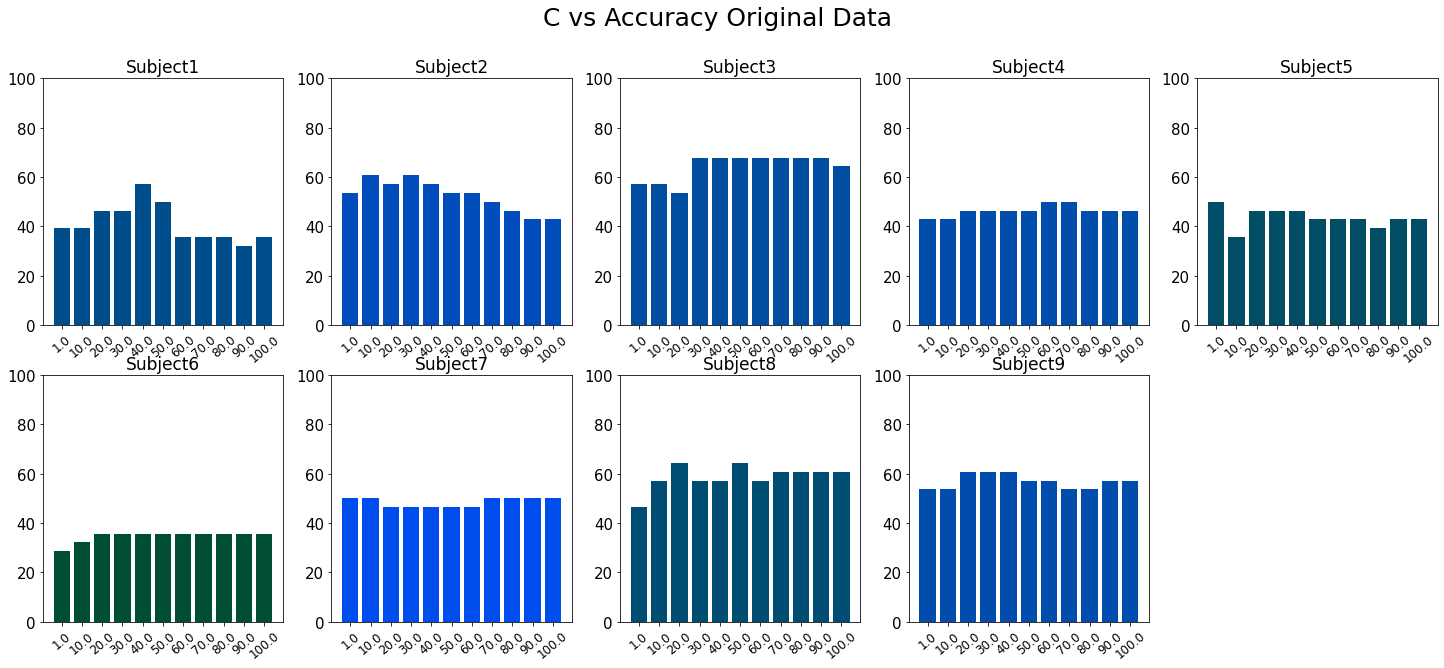

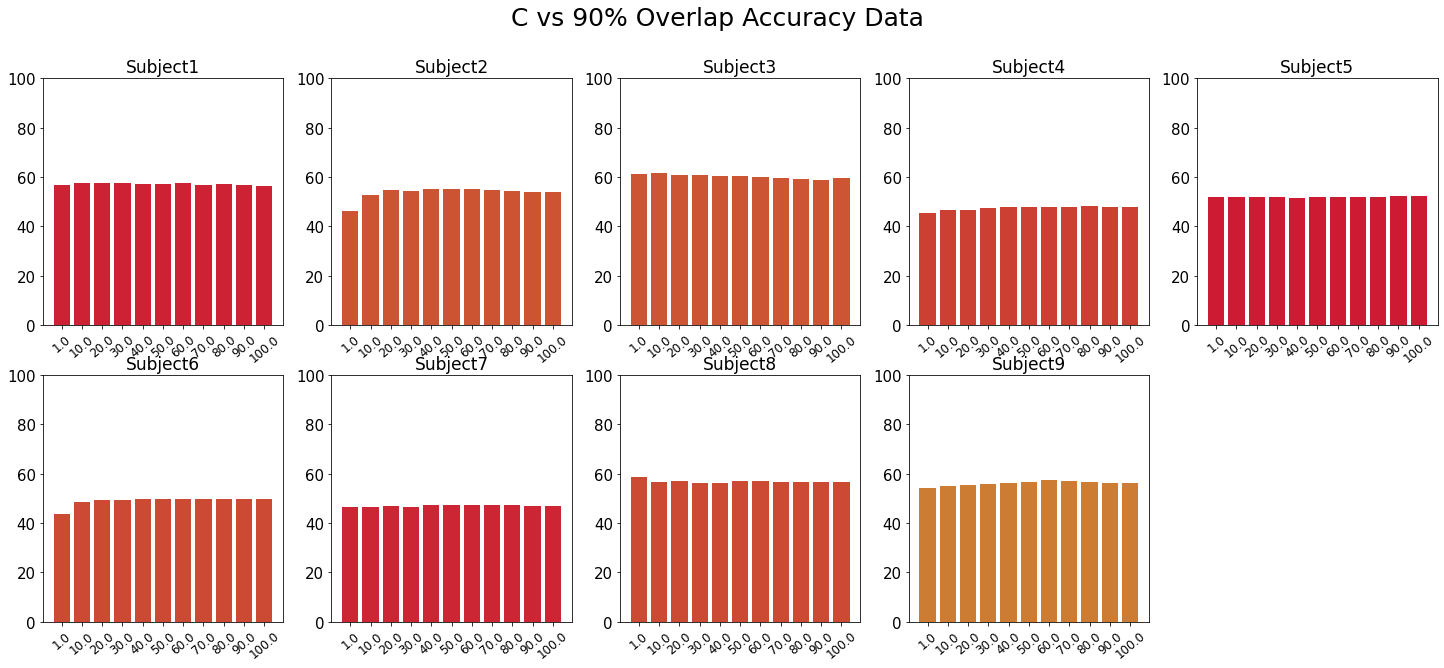

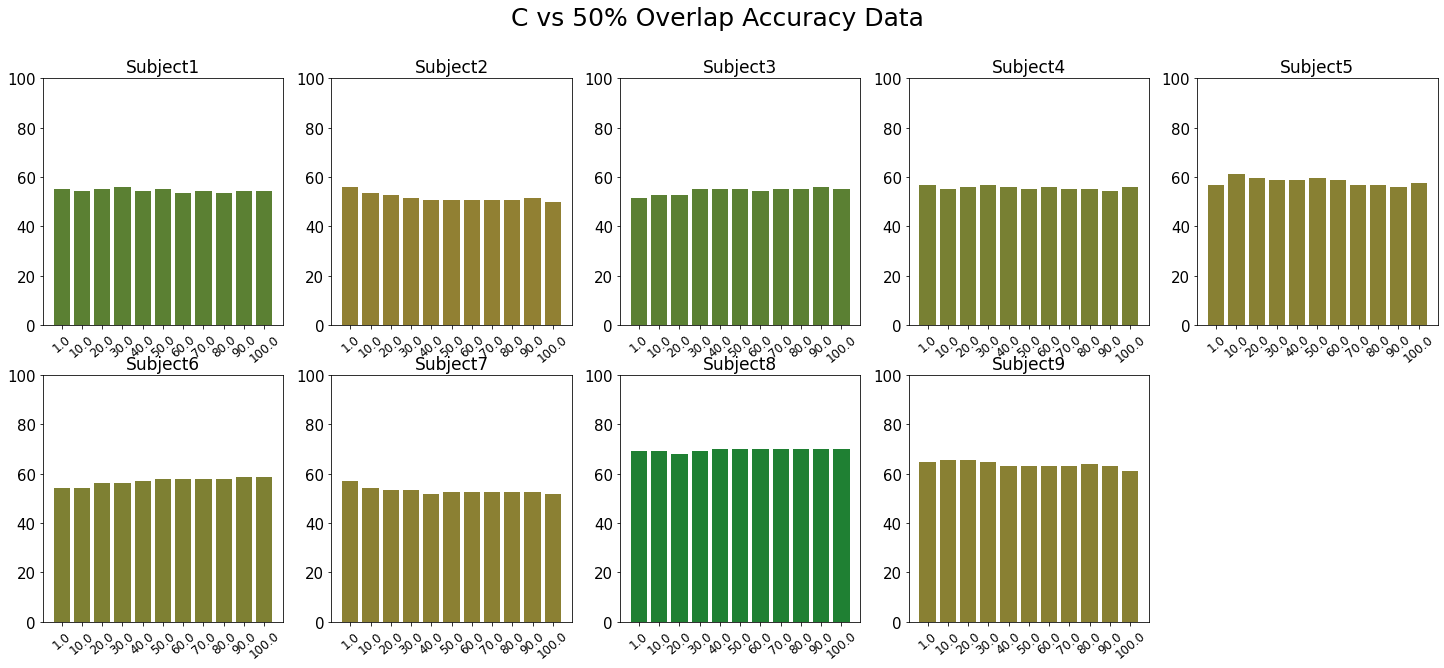

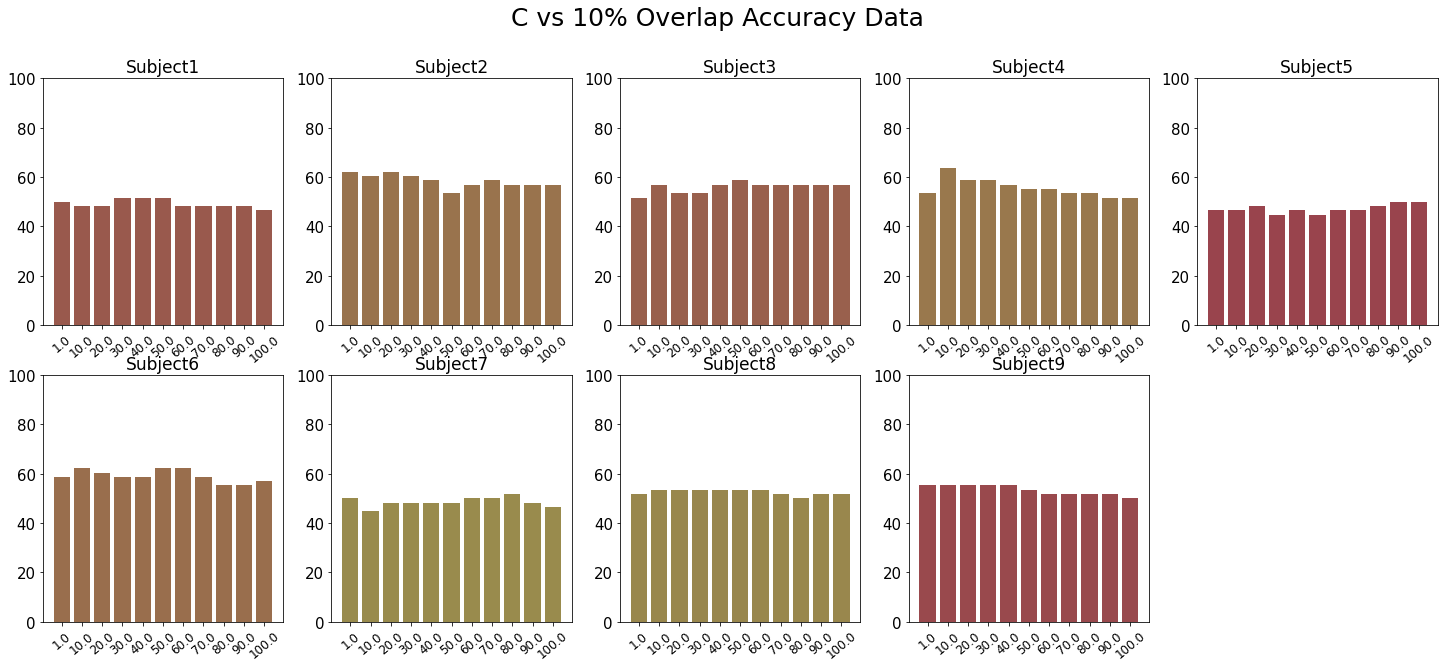

In [206]:
# ============== Original Data ====================
showFig(ol=None, idx=idx, CVal=Cval)

# ============== 90% Overlap Data =================
showFig(ol=90, idx=idx, CVal=Cval)

# ============== 50% Overlap Data =================
showFig(ol=50, idx=idx, CVal=Cval)

# ============== 10% Overlap Data ==================
showFig(ol=10, idx=idx, CVal=Cval)

Which subject to compare? (1-9):5


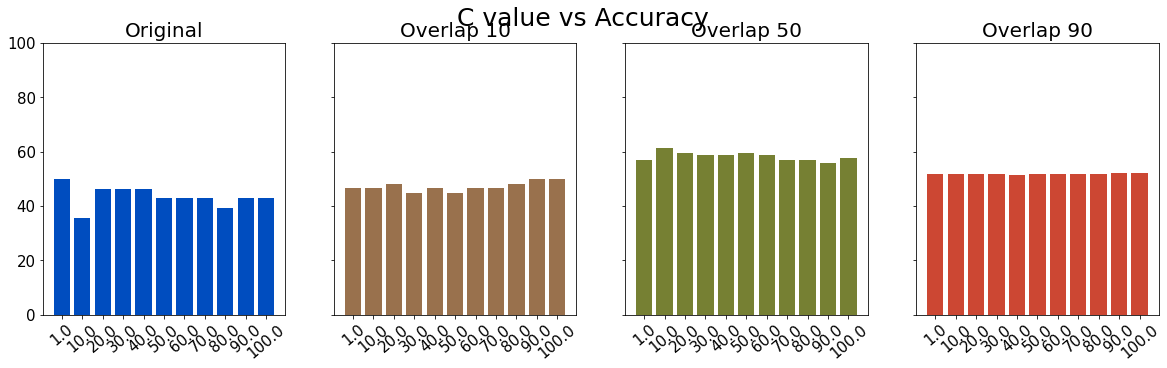

In [207]:
# ================ Comparing =====================

no = input('Which subject to compare? (1-9):')
res = globals()['res0' + str(no)]
res_ol10 = globals()['res0' + str(no) + '_ol10']
res_ol50 = globals()['res0' + str(no) + '_ol50']
res_ol90 = globals()['res0' + str(no) + '_ol90']


# ======== Data 1 ========
fig_comp, ax = plt.subplots(1, 4, sharey = True, figsize=(20, 5))
fig_comp.suptitle('C value vs Accuracy', fontsize=25)

co1 = (0, 0.3, np.random.uniform(0.2, 1))

ax[0].bar(idx, res[:, 1], color=co1)
ax[0].set_title('Original', fontsize=20)
ax[0].set_xticks(idx)
ax[0].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[0].set_ylim(0, 100)
ax[0].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 2 ========
co2 = (0.6, np.random.uniform(0.2, 0.6), 0.3)

ax[1].bar(idx, res_ol10[:, 1], color=co2)
ax[1].set_title('Overlap 10', fontsize=20)
ax[1].set_xticks(idx)
ax[1].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[1].set_ylim(0, 100)
ax[1].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 3 ==========

co3 = (np.random.uniform(0.1, 0.7), 0.5, 0.2)

ax[2].bar(idx, res_ol50[:, 1], color=co3)
ax[2].set_title('Overlap 50', fontsize=20)
ax[2].set_xticks(idx)
ax[2].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[2].set_ylim(0, 100)
ax[2].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 4 ======== 
co4 = (0.8, np.random.uniform(0.1, 0.5), 0.2) # Ramdomize color

ax[3].bar(idx, res_ol90[:, 1], color=co4)
ax[3].set_title('Overlap 90', fontsize=20)
ax[3].set_xticks(idx)
ax[3].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[3].set_ylim(0, 100)
ax[3].set_yticklabels(np.arange(0, 101, 20), fontsize=15)



plt.show()

## Power Spectrum Density

Step:  
1. Check the array containing trial data with dimension trial x no. electrodes x samples
2. Grab the C3 and C4, now array shape should be trial x 2 x samples
3. Find out how to calculate the PSD 
4. Calculate PSD on each trial
5. Plot the data
6. Should I average over all trials?

![psd-eeg-clip1](./img/psd-eeg-clip1.png)

In [208]:
fs, ns, cue_dur, mi_dur

(250, 9, 313, 688)

In [209]:
print('The amount of samples to be clipped:', mi_dur+cue_dur+125)

The amount of samples to be clipped: 1126


In [210]:
# Fetch 1126 samples of each event from sample_data
# Store them in E_left and E_right respectively, For convenience 'E' is used to imitate the variable used in paper
# Preparing the variables to store event samples of shape 72 x 1126 x 22
# Subject 01-09
for i in range(1, 10):
    E_l = 'E0' + str(i) + '_left'
    E_r = 'E0' + str(i) + '_right'
    pos_l = globals()['pos0' + str(i) + '_l'] # Contains etype, index of samples coresponds to left
    pos_r = globals()['pos0' + str(i) + '_r'] # Contains etype, index of samples coresponds to right
    
    sample = globals()['sample_data0' + str(i)]
    
    globals()[E_l] = np.zeros([pos_l.shape[0], mi_dur+cue_dur+125, sample.shape[1]])
    globals()[E_r] = np.zeros([pos_r.shape[0], mi_dur+cue_dur+125, sample.shape[1]])

In [211]:
E01_left.shape, E01_right.shape 

((72, 1126, 22), (72, 1126, 22))

In [212]:
# Now we are ready to take 1126 samples of left and right
# Subject 01-09
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    sample = globals()['sample_data0' + str(i)]

    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    for j in range(E_l.shape[0]):
        E_l[j]=sample.iloc[pos_l[j]-125 : pos_l[j]+cue_dur+mi_dur, :]
    for k in range(E_r.shape[0]):
        E_r[k]=sample.iloc[pos_r[j]-125 : pos_r[j]+cue_dur+mi_dur, :]

In [213]:
# Convert them to N x T array, N = electrodes, T = samples
for i in range(1, ns+1):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    E_l_trans = 'E0' + str(i) + '_left'
    E_r_trans = 'E0' + str(i) + '_right'

    if (E_l.shape[1] != 22 and E_r.shape[1] != 22):
        globals()[E_l_trans] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_trans] = np.transpose(E_r, (0, 2, 1))

In [214]:
E01_left.shape, E01_right.shape

((72, 22, 1126), (72, 22, 1126))

According to the datasheet, electrodes number 8 and 12 corespond to electrodes C3 and C4.   
Grab electrodes number 8 and 12 from data E_left and E_right.  
  
*Note that in python index starts at 0, thus 8 = 7, 12 = 11*

In [176]:
# # Grab index 7 and 11 from each E data
# # Create array to store data
# for i in range(1, ns+1):
#     C3 = 'C3_0' + str(i)
#     C4 = 'C4_0' + str(i)
    
#     E = globals()['E01_left'] # Both have same size, enough to choose one
    
#     globals()[C3] = np.zeros([E01_left.shape[0], 2, E01_left.shape[2]])
#     globals()[C4] = np.zeros([E01_left.shape[0], 2, E01_left.shape[2]])

# for i in range(1, ns+1):
#     C3 = globals()['C3_0' + str(i)]
#     C4 = globals()['C4_0' + str(i)]
    
#     E_l = globals()['E0' + str(i) + '_left']
#     E_r = globals()['E0' + str(i) + '_right']
    
#     for j in range(E_l.shape[0]):
#         C3[j] = np.vstack((E_l[j, 7, :], E_r[j, 7, :]))
#         C4[j] = np.vstack((E_l[j, 11, :], E_r[j, 11, :])) 

In [177]:
# dframe(C3_01[0], index=['left', 'right'])

### Divide into left class and right class, containing C3 and C4

In [215]:
# Diving them by left and right class
# So left and right class will be array of one subject containing all trials consist of C3 and C4
# Dimension of array trial x electrodes x samples

# Preparing array
for i in range(1, ns+1):
    left_ers = 'left0' + str(i) + '_ers'
    right_ers = 'right0' + str(i) + '_ers'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[left_ers] = np.zeros([E_l.shape[0], 2, E_r.shape[2]])
    globals()[right_ers] = np.zeros([E_r.shape[0], 2, E_r.shape[2]])
    
    
for i in range(1, ns+1):
    left_ers = globals()['left0' + str(i) + '_ers']
    right_ers = globals()['right0' + str(i) + '_ers']
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']

    for j in range(E_l.shape[0]):
        left_ers[j] = np.vstack((E_l[j, 7, :], E_l[j, 11, :]))
        right_ers[j] = np.vstack((E_r[j, 7, :], E_r[j, 11, :])) 

In [216]:
left01_ers.shape, right01_ers.shape

((72, 2, 1126), (72, 2, 1126))

In [217]:
dframe(left01_ers[0], index=['C3', 'C4'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Averaging over all trials

In [218]:
# Try averaging over all trials within subject
# Expected array per subject 2 x 1126

for i in range(1, ns+1):
    left_avg = 'left0' + str(i) +'_avg'
    right_avg = 'right0' + str(i) + '_avg'
    
    left_ers = globals()['left0' + str(i) + '_ers']
    right_ers = globals()['right0' + str(i) + '_ers']    
    
    globals()[left_avg] = np.mean(left_ers, axis=0)
    globals()[right_avg] = np.mean(right_ers, axis=0)    

In [219]:
left01_avg.shape, right01_avg.shape

((2, 1126), (2, 1126))

In [220]:
dframe(left03_avg, index=['C3', 'C4'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Plotting Data

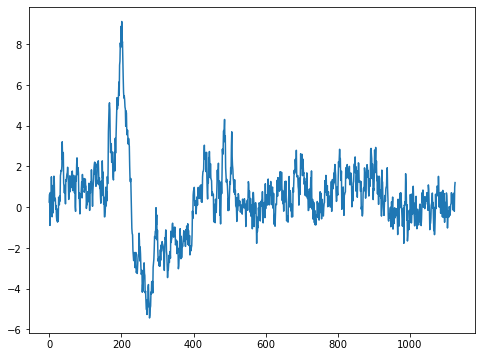

In [221]:
fig = plt.figure(figsize=(8, 6))
plt.plot(left04_avg[0])
plt.show()

In [222]:
# Create ticks for x axis
idx = np.arange(len(left01_avg[0]))

# Convert sample to time, divide by fs
xax = idx/fs

Which subject (1...9)? 5
Which side (left/right)? left


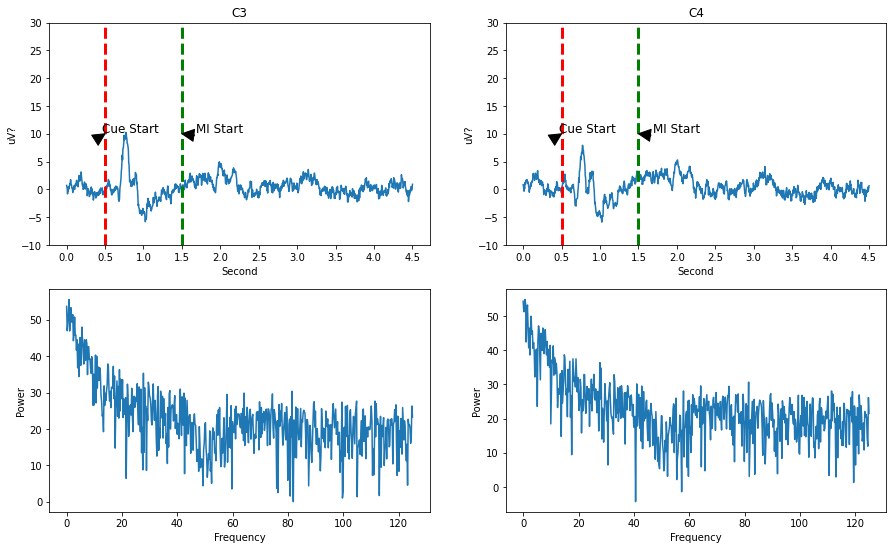

In [225]:
# import pylab as pl
no = input('Which subject (1...9)? ')
side = input('Which side (left/right)? ')

data = globals()[side + '0' + str(no) + '_avg']
figure = plt.figure(figsize = (15, 9))

# ================== C3 =========================
ax1 = figure.add_subplot(221)
ax1.set_title('C3')
ax1.plot(xax, data[0])
ax1.plot([0.5]*50, range(-10, 40), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-10, 40), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-10,ymax=30)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV?')

ax2 = figure.add_subplot(223)
p = 20*np.log10(np.abs(np.fft.rfft(data[0])))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')


# =================== C4 ==========================
ax1 = figure.add_subplot(222)
ax1.set_title('C4')
ax1.plot(xax, data[1])
ax1.plot([0.5]*50, range(-10, 40), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-10, 40), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-10,ymax=30)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV?')

ax2 = figure.add_subplot(224)
p = 20*np.log10(np.abs(np.fft.rfft(data[1])))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')

plt.show()

#### Average over all subjects
Average C3 and C4 over all subject

In [226]:
left_sum = 0
right_sum = 0
for i in range(1, ns+1):
    left = globals()['left0' + str(i) + '_avg']
    right = globals()['right0' + str(i) + '_avg']
    
    left_sum = left_sum + left[0]
    right_sum = right_sum + right[0]


left_avg = left_sum/9
right_avg = right_sum/9

In [227]:
left_avg.shape, right_avg.shape

((1126,), (1126,))

In [231]:
# summ = left01_avg[0] + left02_avg[0] + left03_avg[0] + left04_avg[0] + left05_avg[0] + left06_avg[0] + left07_avg[0] + left08_avg[0] + left09_avg[0]

Which side (left/right)? right


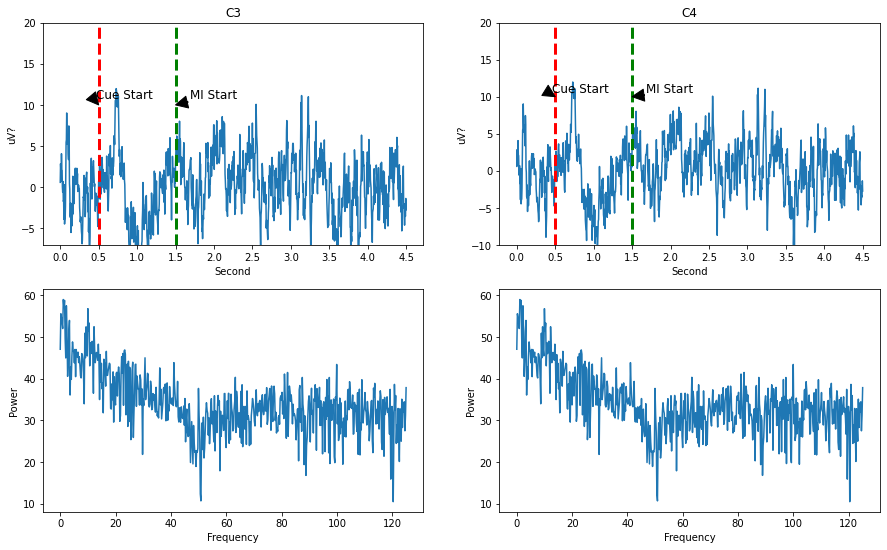

In [229]:
side = input('Which side (left/right)? ')

data = globals()[side + '_avg']
figure = plt.figure(figsize = (15, 9))

# ================== C3 =========================
ax1 = figure.add_subplot(221)
ax1.set_title('C3')
ax1.plot(xax, data)
ax1.plot([0.5]*50, range(-7, 43), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-7, 43), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-7,ymax=20)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV?')

ax2 = figure.add_subplot(223)
p = 20*np.log10(np.abs(np.fft.rfft(data)))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')


# =================== C4 ==========================
ax1 = figure.add_subplot(222)
ax1.set_title('C4')
ax1.plot(xax, data)
ax1.plot([0.5]*50, range(-10, 40), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-10, 40), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-10,ymax=20)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV?')

ax2 = figure.add_subplot(224)
p = 20*np.log10(np.abs(np.fft.rfft(data)))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')

plt.show()

In [312]:
y = left01_avg[1]
y

array([-1.03081597, -0.81515842, -1.73950195, ...,  1.40177409,
        1.03895399,  2.46039497])

1 

In [284]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [280]:
data = np.random.rand(301) - 0.5

In [304]:
ps.shape

(1126,)

In [305]:
time_step = 1 / 250
freqs = np.fft.fftfreq(y.size, time_step)

In [306]:
freqs.shape

(1126,)

In [300]:
idx = np.argsort(freqs)

(0.0, 20.0)

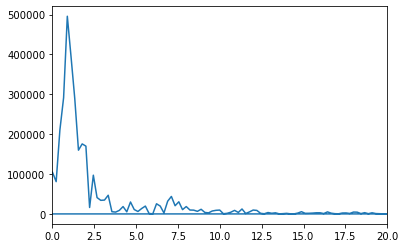

In [319]:
plt.plot(freqs, ps)
plt.xlim([0, 20])

2 https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

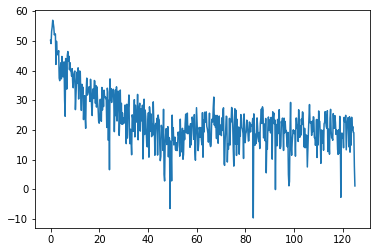

In [308]:
import numpy as np
import pylab as pl

rate = 250.0
t = np.arange(0, 10, 1/rate)
x = np.sin(2*np.pi*4*t) + np.sin(2*np.pi*7*t) + np.random.randn(len(t))*0.2
p = 20*np.log10(np.abs(np.fft.rfft(data[0])))
f = np.linspace(0, rate/2, len(p))
plt.plot(f, p)
plt.show()

3

(0.0, 20.0)

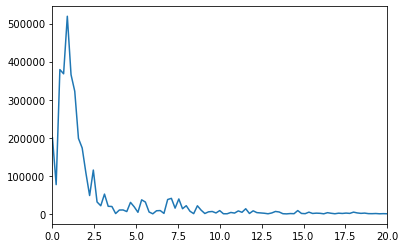

In [318]:
sampling_rate = 250.0

time = np.arange(0, 10, 1/sampling_rate)

# data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))
data = y

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.xlim([0, 20])

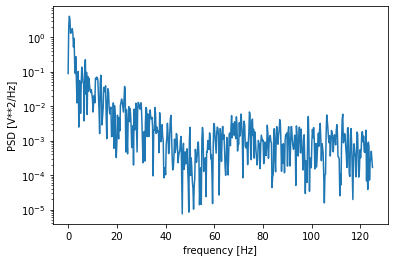

In [316]:
from scipy import signal
import matplotlib.pyplot as plt

f, Pxx_den = signal.welch(y, 250, nperseg=1024)
plt.semilogy(f, Pxx_den)
# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

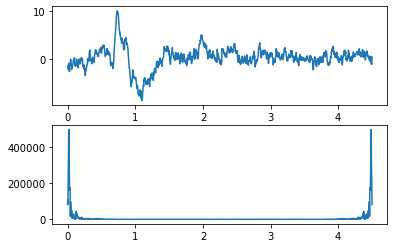

In [277]:
from scipy.fftpack import fft

yf = fft(y)  

plt.subplot(211)
plt.plot(idx_test, left01_avg[0])

plt.subplot(212)
plt.plot(idx_test, np.abs(yf)**2)
plt.show()


In [246]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)


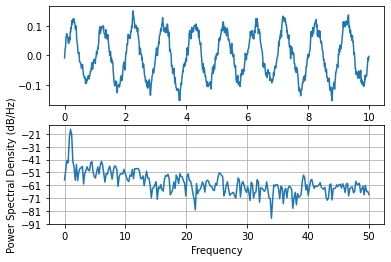

In [255]:
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse
plt.subplot(211)
plt.plot(t, s)

plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()

### Confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
cm = np.array(confusion_matrix(ytest, ypred, labels=[1, 0]))

In [ ]:
confusion = dframe(cm, index=['left hand', 'right hand'],
                columns=['predicted_left', 'predicted_right'])

In [ ]:
confusion

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(ytest, ypred))